In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import cross_val_score
import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN, RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, SelectPercentile, SelectFromModel, SequentialFeatureSelector, SelectFromModel
from sklearn.decomposition import PCA
from scipy import stats
from imblearn.base import SamplerMixin
from sklearn.ensemble import VotingClassifier

In [3]:
class ManualFeatureSelectorTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        #print("fit - ManualFeatureSelectorTransformer - begin", X.shape)
        #print("fit - ManualFeatureSelectorTransformer - end", X.shape)
        return self

    def transform(self, X):
        #print("transform - ManualFeatureSelectorTransformer", X.shape)
        X.drop('Cidade', axis=1, inplace=True)
        X.drop('Codigo', axis=1, inplace=True)
        #print("transform - ManualFeatureSelectorTransformer - end", X.shape)
        return X

In [4]:
class ImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer_numeric = SimpleImputer(strategy='mean')
        self.imputer_categorical = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        #print("fit - ImputerTransformer - begin", X.shape)
        numeric_cols = X.select_dtypes(include=['number']).columns
        categorical_cols = X.select_dtypes(include=['object']).columns

        self.imputer_numeric.fit(X[numeric_cols])
        self.imputer_categorical.fit(X[categorical_cols])
        #print("fit - ImputerTransformer - end", X.shape)
        return self

    def transform(self, X):
        #print("transform - ImputerTransformer - begin", X.shape)
        numeric_cols = X.select_dtypes(include=['number']).columns
        categorical_cols = X.select_dtypes(include=['object']).columns
        X[numeric_cols] = self.imputer_numeric.transform(X[numeric_cols])
        X[categorical_cols] = self.imputer_categorical.transform(X[categorical_cols])
        #print("transform - ImputerTransformer - end", X.shape)
        return X

In [5]:
class DateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        #print("fit - DateTransformer - begin", X.shape)
        #print("fit - DateTransformer - end", X.shape)
        return self

    def transform(self, X):
        #print("transform - DateTransformer", X.shape)
        X['Data'] = pd.to_datetime(X['Data'])
        X['Ano'] = X['Data'].dt.year
        X['Mes'] = X['Data'].dt.month
        X['Dia'] = X['Data'].dt.day
        X.drop('Data', axis=1, inplace=True)
        #print("transform - DateTransformer - end", X.shape)
        return X

In [6]:
class RobustScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.rainfall_scaler = RobustScaler(quantile_range=(6.5, 93.5))
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        #print("fit - RobustScalerTransformer - begin", X.shape)
        self.scaler.fit(X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 
                'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H',
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H',
                'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia','Radiacao Global', 'Altitude']])
        self.rainfall_scaler.fit(X[['Precipitacao Total']])
        #print("fit - RobustScalerTransformer - end", X.shape)
        return self

    def transform(self, X):
        #print("transform - RobustScalerTransformer - begin", X.shape)
        X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima','Umidade Minima',
      'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H', 
      'Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H',
      'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia',
      'Radiacao Global', 'Altitude']] = self.scaler.transform(
          X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 'Direcao Vento 0H', 
                'Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 'Rajada Maxima de Vento 12H',
                'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H',
                'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia', 'Radiacao Global', 'Altitude']])
        X['Precipitacao Total'] = self.rainfall_scaler.transform(X[['Precipitacao Total']])
        #print("transform - RobustScalerTransformer - end", X.shape)
        return X

In [7]:
class SimpleRobustScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.rainfall_scaler = RobustScaler()
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        #print("fit - RobustScalerTransformer - begin", X.shape)
        self.scaler.fit(X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 
                'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H',
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H',
                'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia','Radiacao Global', 'Altitude']])
        self.rainfall_scaler.fit(X[['Precipitacao Total']])
        #print("fit - RobustScalerTransformer - end", X.shape)
        return self

    def transform(self, X):
        #print("transform - RobustScalerTransformer - begin", X.shape)
        X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima','Umidade Minima',
      'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H', 
      'Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H',
      'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia',
      'Radiacao Global', 'Altitude']] = self.scaler.transform(
          X[['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 'Direcao Vento 0H', 
                'Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 'Rajada Maxima de Vento 12H',
                'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H',
                'Latitude', 'Longitude', 'Ano', 'Mes', 'Dia', 'Radiacao Global', 'Altitude']])
        X['Precipitacao Total'] = self.rainfall_scaler.transform(X[['Precipitacao Total']])
        #print("transform - RobustScalerTransformer - end", X.shape)
        return X

In [8]:
def handleOutliersZIndex(X, threshold = 3):
    #print("handleOutliersZIndex - begin", X.shape)
    columns = ['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 
                'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 
                'Vento Velocidade Media 18H', 'Radiacao Global', 'Altitude']
    
    for column in columns:
        non_zero_mask = (X[column].notna())

        nz_X = X[non_zero_mask]
        z_scores = np.abs(stats.zscore(nz_X[column]))
        outliers_mask = (z_scores > threshold)

        nz_X.loc[outliers_mask, column] = nz_X[(~outliers_mask)][column].mean()

        X.loc[non_zero_mask, column] = nz_X[column]
    
    column = 'Precipitacao Total'
    non_zero_mask = (X[column] != 0) & (X[column].notna())

    nz_X = X[non_zero_mask]
    z_scores = np.abs(stats.zscore(nz_X[column]))
    outliers_mask = (z_scores > threshold)

    nz_X.loc[outliers_mask, column] = nz_X[(~outliers_mask)][column].mean()

    X.loc[non_zero_mask, column] = nz_X[column]

    #print("handleOutliersZIndex - end", X.shape)
    return X

In [9]:
def handleOutliersSimpleZIndex(X, threshold = 3):
    #print("handleOutliersZIndex - begin", X.shape)
    columns = ['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 
                'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H', 
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 
                'Vento Velocidade Media 18H', 'Radiacao Global', 'Altitude', 'Precipitacao Total']
    
    for column in columns:
        non_zero_mask = (X[column].notna())

        nz_X = X[non_zero_mask]
        z_scores = np.abs(stats.zscore(nz_X[column]))
        outliers_mask = (z_scores > threshold)

        nz_X.loc[outliers_mask, column] = nz_X[(~outliers_mask)][column].mean()

        X.loc[non_zero_mask, column] = nz_X[column]

    #print("handleOutliersZIndex - end", X.shape)
    return X

In [10]:
def get_mlp(data_x, data_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,20,20,10), activation='relu', max_iter=250, random_state=42)
    mlp.fit(data_x, data_y)
    return mlp

In [11]:
def get_dt(data_x, data_y):
    dt = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=None, criterion='gini')
    dt.fit(data_x, data_y)
    return dt

In [12]:
def get_rf(data_x, data_y):
    rf = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=100, random_state=42)
    rf.fit(data_x, data_y)
    return rf

In [13]:
def get_sgd(data_x, data_y):
    sgd = SGDClassifier(max_iter=3000, tol=1e-3, class_weight='balanced', random_state=42)
    sgd.fit(data_x, data_y)
    return sgd

In [14]:
def get_logistic_regression(data_x, data_y):
    lr = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)
    lr.fit(data_x, data_y)
    return lr

In [15]:
def get_bagging(data_x, data_y):
   base_classifier = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=15, criterion='gini', random_state=42)
   bagging = BaggingClassifier(base_estimator=base_classifier, n_estimators=20, random_state=42)
   bagging.fit(data_x, data_y)
   return bagging

In [16]:
def get_linear_svc(data_x, data_y):
    linear_svc = LinearSVC(class_weight='balanced', random_state=42)
    linear_svc.fit(data_x, data_y)
    return linear_svc

In [17]:
def get_knn(data_x, data_y):
    knn = KNeighborsClassifier(n_neighbors=20)
    knn.fit(data_x, data_y)
    return knn

In [18]:
def get_nb(data_x, data_y):
    nb = BernoulliNB()
    nb.fit(data_x, data_y)
    return nb

In [19]:
def get_ada(data_x, data_y):
    dt = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=5, criterion='gini')
    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=100, algorithm="SAMME", random_state=0)
    ada.fit(data_x, data_y)
    return ada

In [20]:
def get_ensemble(data_x, data_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,20,20,10), activation='relu', max_iter=15, random_state=42)
    rf = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=20, random_state=42)
    base_classifier = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=15, criterion='gini', random_state=42)
    bagging = BaggingClassifier(base_estimator=base_classifier, n_estimators=20, random_state=42)
    ensemble = VotingClassifier(estimators=[('mlp', mlp), ('rf', rf), ('bagging', bagging)], voting='hard')
    ensemble.fit(data_x, data_y)
    return ensemble

In [21]:
def get_lda(data_x, data_y):
    lda = LinearDiscriminantAnalysis()
    lda.fit(data_x, data_y)
    return lda

In [22]:
def plot_result_scikit(model, data_x, data_y):
    y_pred = model.predict(data_x)
    accuracy = accuracy_score(data_y, y_pred),
    y_true  = (data_y == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

In [57]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

raw_X_train, X_test, raw_y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60) #Holdout 20%/80%

#selector = SelectKBest(k=20) #Seleção de features com o SelectKBest
#rf = RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=100, random_state=42)
#selector = SelectFromModel(rf) #Seleção de features com o SelectFromModel

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),#Remoção de colunas de código e cidades
    ('imputer',ImputerTransformer()),#Lidando com valores faltantes restantes
    ('date', DateTransformer()),#Separa coluna de data em dia, mês e ano
    ('scaler', RobustScalerTransformer()),#Normalização dos dados
    #('scaler', SimpleRobustScalerTransformer()),#Normalização dos dados
    #('PCA', PCA(n_components=21)),
    #('selector', selector),
    ])

#X_train = pipeline.fit_transform(handleOutliersSimpleZIndex(raw_X_train.copy(),3), raw_y_train.copy()) # Abordagem simples para lidar com outliers
#X_train = pipeline.fit_transform(handleOutliersZIndex(raw_X_train.copy(),3), raw_y_train.copy()) # Abordagem complexa para lidar com outliers
X_train = pipeline.fit_transform(raw_X_train.copy(), raw_y_train.copy())
y_train = raw_y_train.copy()

X_test = pipeline.transform(X_test.copy())

# Abordagens para lidar com dados desbalanceados
os = RandomOverSampler(random_state=42)
#os = SMOTE(random_state=42, k_neighbors=5)
#os = BorderlineSMOTE(random_state=42, k_neighbors=10)
X_train, y_train = os.fit_resample(X_train.copy(), y_train.copy())

scikit_model = get_lda(X_train.copy(), y_train.copy())
print("lda")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_bagging(X_train.copy(), y_train.copy())
print("bagging")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_rf(X_train.copy(), y_train.copy())
print("rf")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_ada(X_train, y_train)
print("ada")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_logistic_regression(X_train, y_train)
print("logistic_regression")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_mlp(X_train, y_train)
print("mlp")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_ensemble(X_train, y_train)
print("ensemble")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_sgd(X_train, y_train)
print("sgd")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_linear_svc(X_train, y_train)
print("svc")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_nb(X_train, y_train)
print("nb")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

scikit_model = get_knn(X_train, y_train)
print("knn")
print("training:")
plot_result_scikit(scikit_model, pipeline.transform(raw_X_train.copy()), raw_y_train.copy()) 
print("over sampled training:")
plot_result_scikit(scikit_model, X_train.copy(), y_train.copy()) 
print("test:")
plot_result_scikit(scikit_model, X_test.copy(),y_test.copy())

256311
240452
lda
training:
Accuracy: (0,6842707201563727,) | Precision:0,45797021971602625 | Recall:0,7155896652571577 | F1-score:0,5585036782879241
0,6842707201563727	0,45797021971602625	0,7155896652571577	0,5585036782879241
over sampled training:
Accuracy: (0,692979419951254,) | Precision:0,685260563770283 | Recall:0,7138118519159492 | F1-score:0,6992448805159395
0,692979419951254	0,685260563770283	0,7138118519159492	0,6992448805159395
test:
Accuracy: (0,6848266827472916,) | Precision:0,4582125718629734 | Recall:0,7198089267054785 | F1-score:0,5599651618522282
0,6848266827472916	0,4582125718629734	0,7198089267054785	0,5599651618522282
bagging
training:
Accuracy: (0,8815196427550283,) | Precision:0,7375576745616733 | Recall:0,8933181826649033 | F1-score:0,8079997978147141
0,8815196427550283	0,7375576745616733	0,8933181826649033	0,8079997978147141
over sampled training:
Accuracy: (0,8950734795713812,) | Precision:0,8812559149362579 | Recall:0,9131945946725508 | F1-score:0,896941023153

c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


ensemble
training:
Accuracy: (0,8523141385208021,) | Precision:0,6838536968603602 | Recall:0,875584449453272 | F1-score:0,7679325583864987
0,8523141385208021	0,6838536968603602	0,875584449453272	0,7679325583864987
over sampled training:
Accuracy: (0,8689626328617372,) | Precision:0,8509540859020261 | Recall:0,8946191897777586 | F1-score:0,8722405017013977
0,8689626328617372	0,8509540859020261	0,8946191897777586	0,8722405017013977
test:
Accuracy: (0,7337963444303508,) | Precision:0,5167849498704518 | Recall:0,6848037020450813 | F1-score:0,5890472521828454
0,7337963444303508	0,5167849498704518	0,6848037020450813	0,5890472521828454
sgd
training:
Accuracy: (0,6776789473957819,) | Precision:0,4515170235333885 | Recall:0,7215878397257978 | F1-score:0,5554647394533827
0,6776789473957819	0,4515170235333885	0,7215878397257978	0,5554647394533827
over sampled training:
Accuracy: (0,690599806746564,) | Precision:0,6798388852601785 | Recall:0,7205180345837119 | F1-score:0,6995876129863402
0,6905998

c:\Users\Public\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


svc
training:
Accuracy: (0,6855547642193583,) | Precision:0,45930232558139533 | Recall:0,7151984799657247 | F1-score:0,5593735203059552
0,6855547642193583	0,45930232558139533	0,7151984799657247	0,5593735203059552
over sampled training:
Accuracy: (0,6937942572001327,) | Precision:0,6864429120475074 | Recall:0,7135089920535341 | F1-score:0,6997143099595509
0,6937942572001327	0,6864429120475074	0,7135089920535341	0,6997143099595509
test:
Accuracy: (0,6861574930860244,) | Precision:0,459548470240084 | Recall:0,7186147186147186 | F1-score:0,5605985618213049
0,6861574930860244	0,459548470240084	0,7186147186147186	0,5605985618213049
nb
training:
Accuracy: (0,630346068069931,) | Precision:0,4001856052794391 | Recall:0,6506529068792728 | F1-score:0,4955698222963147
0,630346068069931	0,4001856052794391	0,6506529068792728	0,4955698222963147
over sampled training:
Accuracy: (0,6359444180042977,) | Precision:0,6323809256307448 | Recall:0,6494036545090065 | F1-score:0,6407792549690666
0,635944418004

c:\Users\Public\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: (0,6890686407020025,) | Precision:0,45760863638841937 | Recall:0,6264367816091954 | F1-score:0,5288761460663537
0,6890686407020025	0,45760863638841937	0,6264367816091954	0,5288761460663537


In [29]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

    

def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 5)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 30) * 10)

    
    activation = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1e-1, log=True)
    max_iter = trial.suggest_int('max_iter', 30, 40)

    pipeline = Pipeline(steps=[
        ('manual',ManualFeatureSelectorTransformer()),
        ('imputer',ImputerTransformer()),
        ('date', DateTransformer()),
        ('scaler', RobustScalerTransformer()),
        ('os', RandomOverSampler(random_state=42)),
        ('model', MLPClassifier(hidden_layer_sizes=tuple(layers), activation=activation, solver=solver, max_iter=max_iter*10, alpha=alpha, learning_rate_init=learning_rate_init, random_state=42)),
        ])

    X_train_2, X_val, y_train_2, y_val = train_test_split(X_train.copy(), y_train.copy(), stratify=y_train, test_size=0.1875, random_state=42)
    pipeline.fit(X_train_2, y_train_2)

    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    y_true  = (y_val == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    #score = cross_val_score(pipeline, X.copy(), y.copy(), n_jobs=-1, cv=5).mean()
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  Value: {trial.value}")
    print("  Params:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    print()

print("\n\n\nBest trial:")
trial = study.best_trial

print(f" Val Value: {trial.value}")
print(" Val Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

layers = []
for key, value in trial.params.items():
    if key[:7] == 'n_units':
        layers.append(value * 10)
    
print(f"layers: {layers}")

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=tuple(layers), activation=trial.params['activation'], solver=trial.params['solver'], max_iter=trial.params['max_iter']*10, alpha=trial.params['alpha'], learning_rate_init=trial.params['learning_rate_init'], random_state=42)),
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")


256311
240452


[I 2024-08-04 21:15:22,796] A new study created in memory with name: no-name-24a8f0ef-50d6-4f4d-8e73-b4631958ffa2
[I 2024-08-04 21:18:53,921] Trial 0 finished with value: 0.55181403432544 and parameters: {'n_layers': 3, 'n_units_0': 1, 'n_units_1': 27, 'n_units_2': 27, 'activation': 'identity', 'solver': 'sgd', 'alpha': 6.239626604263786e-05, 'learning_rate_init': 0.01548195480996856, 'max_iter': 38}. Best is trial 0 with value: 0.55181403432544.


Accuracy: 0,6770001565680288 | Precision:0,450168370059668 | Recall:0,7127490412496492 | F1-score:0,55181403432544


[I 2024-08-04 21:25:00,363] Trial 1 finished with value: 0.5550608926009052 and parameters: {'n_layers': 4, 'n_units_0': 16, 'n_units_1': 21, 'n_units_2': 15, 'n_units_3': 24, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.00017896486404367487, 'learning_rate_init': 0.000714533998322623, 'max_iter': 37}. Best is trial 1 with value: 0.5550608926009052.


Accuracy: 0,6844371379364333 | Precision:0,45748423095584667 | Recall:0,7055467215414835 | F1-score:0,5550608926009052


[I 2024-08-04 21:36:46,739] Trial 2 finished with value: 0.5539649582923543 and parameters: {'n_layers': 4, 'n_units_0': 14, 'n_units_1': 25, 'n_units_2': 3, 'n_units_3': 23, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.07404579505629022, 'learning_rate_init': 0.0020889336987528887, 'max_iter': 33}. Best is trial 1 with value: 0.5550608926009052.


Accuracy: 0,6804707478732843 | Precision:0,45364514974346737 | Recall:0,7112524553362641 | F1-score:0,5539649582923543


[I 2024-08-04 21:37:35,316] Trial 3 finished with value: 0.5730244912308113 and parameters: {'n_layers': 1, 'n_units_0': 29, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.05145535227302912, 'learning_rate_init': 0.01806591975764368, 'max_iter': 37}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,7147591461823496 | Precision:0,4919517102615694 | Recall:0,6860911046674774 | F1-score:0,5730244912308113


[I 2024-08-04 21:40:34,619] Trial 4 finished with value: 0.5489251432534034 and parameters: {'n_layers': 4, 'n_units_0': 27, 'n_units_1': 15, 'n_units_2': 22, 'n_units_3': 5, 'activation': 'identity', 'solver': 'sgd', 'alpha': 6.177177409134978e-05, 'learning_rate_init': 0.0004217183965399104, 'max_iter': 39}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,6774959553259224 | Precision:0,4500837921953555 | Recall:0,7033953792909924 | F1-score:0,5489251432534034


[I 2024-08-04 21:41:48,689] Trial 5 finished with value: 0.5536777843954734 and parameters: {'n_layers': 2, 'n_units_0': 18, 'n_units_1': 15, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.00045989045347910785, 'learning_rate_init': 0.00020461068800312526, 'max_iter': 33}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,6871248890976462 | Precision:0,4598404748655166 | Recall:0,6956318398653073 | F1-score:0,5536777843954734


[I 2024-08-04 21:47:06,205] Trial 6 finished with value: 0.5485894594493069 and parameters: {'n_layers': 4, 'n_units_0': 26, 'n_units_1': 24, 'n_units_2': 20, 'n_units_3': 15, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.0021938929951881157, 'learning_rate_init': 0.007602379248451267, 'max_iter': 35}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,686420332968008 | Precision:0,4583804143126177 | Recall:0,6830043962211205 | F1-score:0,5485894594493069


c:\Users\Public\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-04 21:48:02,773] Trial 7 finished with value: 0.0 and parameters: {'n_layers': 5, 'n_units_0': 25, 'n_units_1': 4, 'n_units_2': 6, 'n_units_3': 3, 'n_units_4': 11, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.03639704109680688, 'learning_rate_init': 0.012336985004580043, 'max_iter': 39}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,7210218673346902 | Precision:0,0 | Recall:0,0 | F1-score:0,0


[I 2024-08-04 21:49:22,762] Trial 8 finished with value: 0.5543727064636849 and parameters: {'n_layers': 2, 'n_units_0': 28, 'n_units_1': 10, 'activation': 'identity', 'solver': 'adam', 'alpha': 4.051650452279873e-05, 'learning_rate_init': 0.001867969943144337, 'max_iter': 33}. Best is trial 3 with value: 0.5730244912308113.


Accuracy: 0,6799488544439225 | Precision:0,4532438212927757 | Recall:0,7135908708259283 | F1-score:0,5543727064636849


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-04 22:28:32,169] Trial 9 finished with value: 0.5992311219271329 and parameters: {'n_layers': 5, 'n_units_0': 10, 'n_units_1': 7, 'n_units_2': 27, 'n_units_3': 16, 'n_units_4': 28, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0003629543804893746, 'learning_rate_init': 0.00044484921922101567, 'max_iter': 31}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,7034862481081363 | Precision:0,48097610689616127 | Recall:0,7945935833878963 | F1-score:0,5992311219271329


[I 2024-08-04 22:46:00,483] Trial 10 finished with value: 0.5533812419384558 and parameters: {'n_layers': 5, 'n_units_0': 5, 'n_units_1': 4, 'n_units_2': 28, 'n_units_3': 14, 'n_units_4': 30, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0042461138815354195, 'learning_rate_init': 1.9782422145583008e-05, 'max_iter': 30}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,6837586764782632 | Precision:0,45657990756506933 | Recall:0,7022729398559536 | F1-score:0,5533812419384558


[I 2024-08-04 22:46:16,081] Trial 11 finished with value: 0.5756727053568264 and parameters: {'n_layers': 1, 'n_units_0': 9, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.009016617294184317, 'learning_rate_init': 0.04965978416877037, 'max_iter': 30}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,687672877198476 | Precision:0,4635190682804293 | Recall:0,7594238144233467 | F1-score:0,5756727053568264


[I 2024-08-04 22:46:46,253] Trial 12 finished with value: 0.5694283201407212 and parameters: {'n_layers': 1, 'n_units_0': 9, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.005260644785464895, 'learning_rate_init': 0.07001893634980275, 'max_iter': 30}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,6806273159020928 | Precision:0,45635502424720875 | Recall:0,756991862314096 | F1-score:0,5694283201407212


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-04 22:54:47,356] Trial 13 finished with value: 0.5953590657465686 and parameters: {'n_layers': 2, 'n_units_0': 11, 'n_units_1': 10, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.012366264369741909, 'learning_rate_init': 4.85405338228305e-05, 'max_iter': 31}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,7215176660925839 | Precision:0,5006057514506154 | Recall:0,7343560003741465 | F1-score:0,5953590657465686


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (320) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-04 23:01:57,300] Trial 14 finished with value: 0.5889160040935212 and parameters: {'n_layers': 2, 'n_units_0': 11, 'n_units_1': 9, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.000738853397882023, 'learning_rate_init': 6.715957994697982e-05, 'max_iter': 32}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,7274672511873076 | Precision:0,508392796466191 | Recall:0,6997474511271162 | F1-score:0,5889160040935212


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (320) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-04 23:14:31,543] Trial 15 finished with value: 0.5848675522411249 and parameters: {'n_layers': 3, 'n_units_0': 20, 'n_units_1': 9, 'n_units_2': 12, 'activation': 'relu', 'solver': 'adam', 'alpha': 1.2230720566353867e-05, 'learning_rate_init': 1.1107925076906635e-05, 'max_iter': 32}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,7211001513490946 | Precision:0,5000996346728661 | Recall:0,7042372088672716 | F1-score:0,5848675522411249


[I 2024-08-04 23:17:44,456] Trial 16 finished with value: 0.5956018006051214 and parameters: {'n_layers': 2, 'n_units_0': 4, 'n_units_1': 1, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.014737538877035678, 'learning_rate_init': 7.053716616530048e-05, 'max_iter': 31}. Best is trial 9 with value: 0.5992311219271329.


Accuracy: 0,714002400709775 | Precision:0,4918042776186704 | Recall:0,7549340566831915 | F1-score:0,5956018006051214


[I 2024-08-04 23:27:53,006] Trial 17 finished with value: 0.6074290421628099 and parameters: {'n_layers': 3, 'n_units_0': 4, 'n_units_1': 2, 'n_units_2': 30, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00026300311127326896, 'learning_rate_init': 0.00015373773782206807, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7264234643285841 | Precision:0,5064626912269747 | Recall:0,7586755214666542 | F1-score:0,6074290421628099


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 00:13:28,104] Trial 18 finished with value: 0.5960992515577186 and parameters: {'n_layers': 5, 'n_units_0': 5, 'n_units_1': 1, 'n_units_2': 29, 'n_units_3': 30, 'n_units_4': 30, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00036682609830777983, 'learning_rate_init': 0.0001861300116019933, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7141328740671155 | Precision:0,49196689386562803 | Recall:0,7561500327378169 | F1-score:0,5960992515577186


[I 2024-08-05 00:18:29,114] Trial 19 finished with value: 0.5908844079209354 and parameters: {'n_layers': 3, 'n_units_0': 2, 'n_units_1': 6, 'n_units_2': 23, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016472097782466737, 'learning_rate_init': 0.002789613411732404, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7051041177391577 | Precision:0,4819867706118592 | Recall:0,7633523524459827 | F1-score:0,5908844079209354


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 00:52:43,336] Trial 20 finished with value: 0.4896741410656846 and parameters: {'n_layers': 3, 'n_units_0': 7, 'n_units_1': 18, 'n_units_2': 30, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016060064430225654, 'learning_rate_init': 0.000230397341349013, 'max_iter': 40}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7143416314388602 | Precision:0,48810408921933085 | Recall:0,4912543260686559 | F1-score:0,4896741410656846


[I 2024-08-05 01:36:00,336] Trial 21 finished with value: 0.5871278458844132 and parameters: {'n_layers': 5, 'n_units_0': 4, 'n_units_1': 1, 'n_units_2': 30, 'n_units_3': 29, 'n_units_4': 30, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002946084959355897, 'learning_rate_init': 0.00016302627916472439, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7047126976671364 | Precision:0,4813064545073877 | Recall:0,7525956411935273 | F1-score:0,5871278458844132


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 01:59:15,781] Trial 22 finished with value: 0.6012723324825722 and parameters: {'n_layers': 5, 'n_units_0': 7, 'n_units_1': 4, 'n_units_2': 24, 'n_units_3': 10, 'n_units_4': 23, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0011489033663903963, 'learning_rate_init': 0.0005724244971436988, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7268670737435415 | Precision:0,5071979434447301 | Recall:0,7381910017771958 | F1-score:0,6012723324825722


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 02:18:35,263] Trial 23 finished with value: 0.6026686999618758 and parameters: {'n_layers': 4, 'n_units_0': 13, 'n_units_1': 6, 'n_units_2': 24, 'n_units_3': 10, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001246300304553496, 'learning_rate_init': 0.0007564471157424167, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7280413339596055 | Precision:0,5086556406461162 | Recall:0,7393134412122346 | F1-score:0,6026686999618758


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 02:36:36,976] Trial 24 finished with value: 0.5925517849272808 and parameters: {'n_layers': 4, 'n_units_0': 13, 'n_units_1': 4, 'n_units_2': 24, 'n_units_3': 9, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0014038658321438402, 'learning_rate_init': 0.0009325596049495052, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7105057147330515 | Precision:0,4878152022736893 | Recall:0,7545599102048453 | F1-score:0,5925517849272808


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 02:52:25,208] Trial 25 finished with value: 0.5848281159976955 and parameters: {'n_layers': 4, 'n_units_0': 7, 'n_units_1': 6, 'n_units_2': 19, 'n_units_3': 9, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0009785665817422223, 'learning_rate_init': 0.0013772965606382102, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7179426961014561 | Precision:0,4961548488008342 | Recall:0,7120942849125432 | F1-score:0,5848281159976955


[I 2024-08-05 03:18:25,089] Trial 26 finished with value: 0.4999767798263131 and parameters: {'n_layers': 4, 'n_units_0': 21, 'n_units_1': 13, 'n_units_2': 25, 'n_units_3': 10, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001322657055407907, 'learning_rate_init': 0.004199446661022126, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7190386723031157 | Precision:0,4964951116030253 | Recall:0,5035076232344963 | F1-score:0,4999767798263131


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 03:54:09,646] Trial 27 finished with value: 0.5914045582999963 and parameters: {'n_layers': 5, 'n_units_0': 14, 'n_units_1': 30, 'n_units_2': 18, 'n_units_3': 18, 'n_units_4': 1, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0031486523691949715, 'learning_rate_init': 0.00048589204440426984, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7094880225457961 | Precision:0,4866513650640251 | Recall:0,7536245440089795 | F1-score:0,5914045582999963


[I 2024-08-05 04:03:08,759] Trial 28 finished with value: 0.5783920344776341 and parameters: {'n_layers': 3, 'n_units_0': 6, 'n_units_1': 12, 'n_units_2': 13, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000746309522448927, 'learning_rate_init': 0.00010458666017261119, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7038776681801576 | Precision:0,47975346687211096 | Recall:0,7280890468618464 | F1-score:0,5783920344776341


[I 2024-08-05 04:07:52,665] Trial 29 finished with value: 0.5317327840323898 and parameters: {'n_layers': 3, 'n_units_0': 1, 'n_units_1': 3, 'n_units_2': 26, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 2.593470793311586e-05, 'learning_rate_init': 2.1638224191088903e-05, 'max_iter': 37}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,6559417566932833 | Precision:0,4286041451963815 | Recall:0,7002151342250491 | F1-score:0,5317327840323898


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 04:22:13,363] Trial 30 finished with value: 0.6056506465356156 and parameters: {'n_layers': 4, 'n_units_0': 2, 'n_units_1': 7, 'n_units_2': 21, 'n_units_3': 6, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 9.768940200509225e-05, 'learning_rate_init': 0.0007312023492438447, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7246490266687542 | Precision:0,5043256363975851 | Recall:0,7579272285099616 | F1-score:0,6056506465356156


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 04:35:27,192] Trial 31 finished with value: 0.5984658398451503 and parameters: {'n_layers': 4, 'n_units_0': 2, 'n_units_1': 6, 'n_units_2': 21, 'n_units_3': 5, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 9.743464048684794e-05, 'learning_rate_init': 0.0007788869830227008, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7076874902144982 | Precision:0,4851513918753996 | Recall:0,7808437003086709 | F1-score:0,5984658398451503


[I 2024-08-05 04:45:24,173] Trial 32 finished with value: 0.5966983792727409 and parameters: {'n_layers': 3, 'n_units_0': 3, 'n_units_1': 8, 'n_units_2': 17, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002353434958930407, 'learning_rate_init': 0.00030407177037692355, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7201346485047754 | Precision:0,4989309520814992 | Recall:0,7421195397998316 | F1-score:0,5966983792727409


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (330) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 04:56:51,416] Trial 33 finished with value: 0.599242755206058 and parameters: {'n_layers': 4, 'n_units_0': 8, 'n_units_1': 3, 'n_units_2': 24, 'n_units_3': 1, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005994587111020378, 'learning_rate_init': 0.001061819819866984, 'max_iter': 33}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7127498564793069 | Precision:0,4905525421708291 | Recall:0,7698063791974558 | F1-score:0,599242755206058


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (360) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 05:21:38,798] Trial 34 finished with value: 0.5946754194018964 and parameters: {'n_layers': 5, 'n_units_0': 1, 'n_units_1': 5, 'n_units_2': 22, 'n_units_3': 11, 'n_units_4': 19, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 6.391473515254237e-05, 'learning_rate_init': 0.002738841391102565, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7099838213036898 | Precision:0,4873572837587423 | Recall:0,7626040594892901 | F1-score:0,5946754194018964


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (370) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 05:39:32,284] Trial 35 finished with value: 0.5975254213183531 and parameters: {'n_layers': 4, 'n_units_0': 16, 'n_units_1': 2, 'n_units_2': 25, 'n_units_3': 7, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 9.484003612093658e-05, 'learning_rate_init': 0.0005431956082500377, 'max_iter': 37}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7046083189812641 | Precision:0,4819615715514769 | Recall:0,7859882143859321 | F1-score:0,5975254213183531


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 06:01:27,883] Trial 36 finished with value: 0.5948356631563166 and parameters: {'n_layers': 4, 'n_units_0': 12, 'n_units_1': 18, 'n_units_2': 16, 'n_units_3': 12, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0013033811494454674, 'learning_rate_init': 0.00013016776434324513, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,71789050675852 | Precision:0,496248124062031 | Recall:0,7423066130390048 | F1-score:0,5948356631563166


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (330) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 06:22:22,200] Trial 37 finished with value: 0.48898178018083516 and parameters: {'n_layers': 4, 'n_units_0': 7, 'n_units_1': 12, 'n_units_2': 21, 'n_units_3': 7, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0026860048919216885, 'learning_rate_init': 0.004691233510076809, 'max_iter': 33}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7065132299984344 | Precision:0,47543735642339635 | Recall:0,5033205499953232 | F1-score:0,48898178018083516


[I 2024-08-05 06:25:22,641] Trial 38 finished with value: 0.5503859035969128 and parameters: {'n_layers': 5, 'n_units_0': 16, 'n_units_1': 7, 'n_units_2': 27, 'n_units_3': 20, 'n_units_4': 18, 'activation': 'identity', 'solver': 'sgd', 'alpha': 2.5687657014514557e-05, 'learning_rate_init': 0.00028800820867904613, 'max_iter': 38}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,6777308073691353 | Precision:0,45055731060380283 | Recall:0,7070433074548685 | F1-score:0,5503859035969128


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 06:35:56,817] Trial 39 finished with value: 0.606901753724307 and parameters: {'n_layers': 3, 'n_units_0': 3, 'n_units_1': 3, 'n_units_2': 28, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00021238108946120517, 'learning_rate_init': 0.0015190542539047828, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7280152392881374 | Precision:0,5084681496461072 | Recall:0,7525956411935273 | F1-score:0,606901753724307


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (320) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 06:50:18,881] Trial 40 finished with value: 0.6011192885617909 and parameters: {'n_layers': 3, 'n_units_0': 24, 'n_units_1': 2, 'n_units_2': 28, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00020106385422623914, 'learning_rate_init': 0.0015940162129596668, 'max_iter': 32}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7284588487030949 | Precision:0,5092550496850036 | Recall:0,7334206341782809 | F1-score:0,6011192885617909


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 07:02:12,202] Trial 41 finished with value: 0.6031947450921848 and parameters: {'n_layers': 3, 'n_units_0': 5, 'n_units_1': 5, 'n_units_2': 26, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005204611685606552, 'learning_rate_init': 0.0005621215315116234, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7225614529513074 | Precision:0,5018319567782401 | Recall:0,7558694228790571 | F1-score:0,6031947450921848


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (340) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-08-05 07:13:43,615] Trial 42 finished with value: 0.5978792208768895 and parameters: {'n_layers': 3, 'n_units_0': 3, 'n_units_1': 5, 'n_units_2': 27, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004952889450922928, 'learning_rate_init': 0.00034830590757547623, 'max_iter': 34}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,720943583320286 | Precision:0,49990567817392945 | Recall:0,7436161257132167 | F1-score:0,5978792208768895


[I 2024-08-05 07:14:40,457] Trial 43 finished with value: 0.5517968097089496 and parameters: {'n_layers': 3, 'n_units_0': 5, 'n_units_1': 8, 'n_units_2': 30, 'activation': 'identity', 'solver': 'sgd', 'alpha': 6.746562291592088e-05, 'learning_rate_init': 0.0008048791741269185, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,6781222274411565 | Precision:0,45115864527629235 | Recall:0,7102235525208119 | F1-score:0,5517968097089496


c:\Users\Public\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-08-05 07:15:09,034] Trial 44 finished with value: 0.0 and parameters: {'n_layers': 3, 'n_units_0': 18, 'n_units_1': 3, 'n_units_2': 28, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00011939645451264777, 'learning_rate_init': 0.0011685607662184868, 'max_iter': 33}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7210218673346902 | Precision:0,0 | Recall:0,0 | F1-score:0,0


[I 2024-08-05 07:19:39,813] Trial 45 finished with value: 0.60548917815017 and parameters: {'n_layers': 2, 'n_units_0': 3, 'n_units_1': 5, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000355945140335487, 'learning_rate_init': 0.00232770682361858, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,730311570377329 | Precision:0,5114794273184574 | Recall:0,7418389299410719 | F1-score:0,60548917815017


[I 2024-08-05 07:22:29,790] Trial 46 finished with value: 0.599664380563257 and parameters: {'n_layers': 2, 'n_units_0': 3, 'n_units_1': 2, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00024301865940802188, 'learning_rate_init': 0.009525268420822873, 'max_iter': 36}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7136370753092218 | Precision:0,49153758746486453 | Recall:0,7687774763820036 | F1-score:0,599664380563257


[I 2024-08-05 07:23:57,041] Trial 47 finished with value: 0.5900710212363993 and parameters: {'n_layers': 2, 'n_units_0': 1, 'n_units_1': 22, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0004242183138796056, 'learning_rate_init': 0.025438476265670674, 'max_iter': 37}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,6942487344084338 | Precision:0,47132796780684105 | Recall:0,7887943129735291 | F1-score:0,5900710212363993


[I 2024-08-05 07:27:46,587] Trial 48 finished with value: 0.587229056824839 and parameters: {'n_layers': 2, 'n_units_0': 5, 'n_units_1': 8, 'activation': 'logistic', 'solver': 'adam', 'alpha': 5.289426330776951e-05, 'learning_rate_init': 0.006215422091382295, 'max_iter': 38}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,7242054172537967 | Precision:0,5040901166689017 | Recall:0,7032083060518193 | F1-score:0,587229056824839


[I 2024-08-05 07:28:13,356] Trial 49 finished with value: 0.5519940915805022 and parameters: {'n_layers': 1, 'n_units_0': 30, 'activation': 'identity', 'solver': 'sgd', 'alpha': 0.00016093558040305018, 'learning_rate_init': 0.002699537181406381, 'max_iter': 35}. Best is trial 17 with value: 0.6074290421628099.


Accuracy: 0,683419445749178 | Precision:0,4560375861858564 | Recall:0,6990926947900102 | F1-score:0,5519940915805022
Trial 0:
  Value: 0.55181403432544
  Params:
    n_layers: 3
    n_units_0: 1
    n_units_1: 27
    n_units_2: 27
    activation: identity
    solver: sgd
    alpha: 6.239626604263786e-05
    learning_rate_init: 0.01548195480996856
    max_iter: 38

Trial 1:
  Value: 0.5550608926009052
  Params:
    n_layers: 4
    n_units_0: 16
    n_units_1: 21
    n_units_2: 15
    n_units_3: 24
    activation: identity
    solver: adam
    alpha: 0.00017896486404367487
    learning_rate_init: 0.000714533998322623
    max_iter: 37

Trial 2:
  Value: 0.5539649582923543
  Params:
    n_layers: 4
    n_units_0: 14
    n_units_1: 25
    n_units_2: 3
    n_units_3: 23
    activation: identity
    solver: sgd
    alpha: 0.07404579505629022
    learning_rate_init: 0.0020889336987528887
    max_iter: 33

Trial 3:
  Value: 0.5730244912308113
  Params:
    n_layers: 1
    n_units_0: 29
    acti

2001
Test: Accuracy: 0,6 | Precision:0,18518518518518517 | Recall:0,38461538461538464 | F1-score:0,25
	0,18518518518518517	0,38461538461538464	0,25
2002
Test: Accuracy: 0,6680497925311203 | Precision:0,4230769230769231 | Recall:0,6875 | F1-score:0,5238095238095238
,66804979253112	0,4230769230769231	0,6875	0,5238095238095238
2003
Test: Accuracy: 0,7183673469387755 | Precision:0,390625 | Recall:0,45454545454545453 | F1-score:0,4201680672268907
,71836734693877	0,390625	0,45454545454545453	0,4201680672268907
2004
Test: Accuracy: 0,7439613526570048 | Precision:0,3880597014925373 | Recall:0,6842105263157895 | F1-score:0,4952380952380952
,74396135265700	0,3880597014925373	0,6842105263157895	0,4952380952380952
2005
Test: Accuracy: 0,7395348837209302 | Precision:0,4659090909090909 | Recall:0,82 | F1-score:0,5942028985507246
,73953488372093	0,4659090909090909	0,82	0,5942028985507246
2006
Test: Accuracy: 0,7326732673267327 | Precision:0,4888888888888889 | Recall:0,8461538461538461 | F1-score:0,61

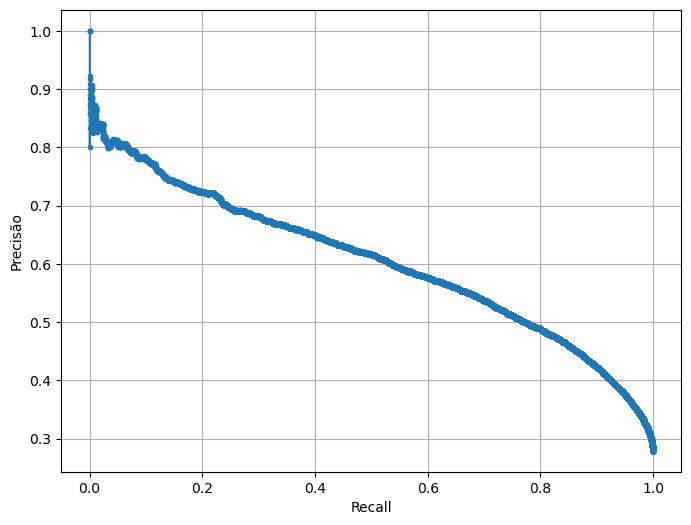

In [24]:
data = pd.read_csv('data.csv', delimiter=';')
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=(40,20,300), activation='tanh', solver='adam', max_iter=350, alpha=0.00026300311127326896, learning_rate_init=0.00015373773782206807, random_state=42)),
    ])

pipeline.fit(X_train, y_train)

for i in range(2001,2025):
    print(i)
    f_X_test = X_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_y_test.reset_index(drop=True, inplace=True)
    

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

for cidade in data['Cidade'].unique():
    print(cidade)
    f_X_test = X_test.copy().loc[X_test['Cidade'] == cidade]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[X_test['Cidade'] == cidade]
    f_y_test.reset_index(drop=True, inplace=True)

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

y_pred = pipeline.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

FP = np.sum((y_pred == 1) & (y_true == 0))
VP = np.sum((y_pred == 1) & (y_true == 1))
FN = np.sum((y_pred == 0) & (y_true == 1))
VN = np.sum((y_pred == 0) & (y_true == 0))

print(f"VP: {VP} - VN: {VN} - FP: {FP} - FN: {FN}")
print(f"{VP}\t{VN}\t{FP}\t{FN}")
print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

class_labels = pipeline.classes_
class_index = np.where(class_labels == "Sim")[0][0]

y_probs = pipeline.predict_proba(X_test.copy())[:, class_index]

y_true  = (y_test.copy() == 'Sim').astype(int)

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

In [22]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=(100,70,270,160,280), activation='logistic', solver='adam', max_iter=310, alpha=0.0003629543804893746, learning_rate_init=0.00044484921922101567, random_state=42)),
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)


print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")


256311
240452


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  warnings.warn(


Test: Accuracy: 0,7100754131085727 | Precision:0,48786333189946535 | Recall:0,7890081494732658 | F1-score:0,602923865578128


c:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  warnings.warn(


2001
Test: Accuracy: 0,52 | Precision:0,15151515151515152 | Recall:0,38461538461538464 | F1-score:0,21739130434782608
,	0,15151515151515152	0,38461538461538464	0,21739130434782608
2002
Test: Accuracy: 0,6307053941908713 | Precision:0,3853211009174312 | Recall:0,65625 | F1-score:0,48554913294797697
,63070539419087	0,3853211009174312	0,65625	0,48554913294797697
2003
Test: Accuracy: 0,673469387755102 | Precision:0,33766233766233766 | Recall:0,4727272727272727 | F1-score:0,3939393939393939
,6734693877551	0,33766233766233766	0,4727272727272727	0,3939393939393939
2004
Test: Accuracy: 0,7391304347826086 | Precision:0,3918918918918919 | Recall:0,7631578947368421 | F1-score:0,5178571428571428
,73913043478260	0,3918918918918919	0,7631578947368421	0,5178571428571428
2005
Test: Accuracy: 0,6976744186046512 | Precision:0,4175824175824176 | Recall:0,76 | F1-score:0,5390070921985816
,69767441860465	0,4175824175824176	0,76	0,5390070921985816
2006
Test: Accuracy: 0,7524752475247525 | Precision:0,511494

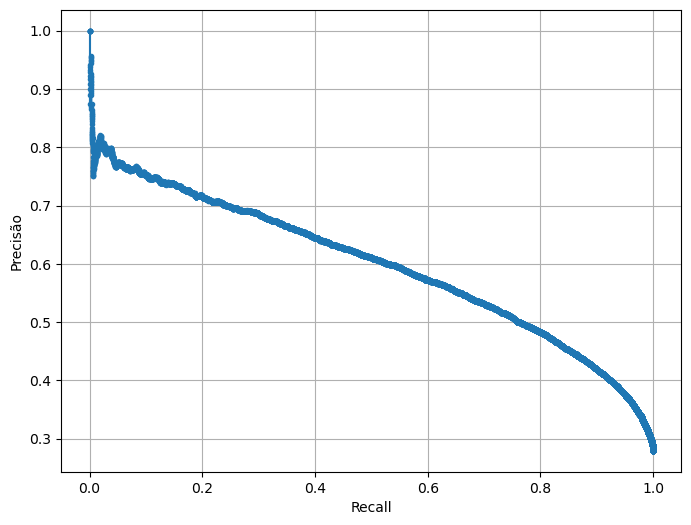

In [25]:
data = pd.read_csv('data.csv', delimiter=';')
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', MLPClassifier(hidden_layer_sizes=(100,70,270,160,280), activation='logistic', solver='adam', max_iter=310, alpha=0.0003629543804893746, learning_rate_init=0.00044484921922101567, random_state=42)),
    ])

pipeline.fit(X_train, y_train)

for i in range(2001,2025):
    print(i)
    f_X_test = X_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_y_test.reset_index(drop=True, inplace=True)
    

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

for cidade in data['Cidade'].unique():
    print(cidade)
    f_X_test = X_test.copy().loc[X_test['Cidade'] == cidade]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[X_test['Cidade'] == cidade]
    f_y_test.reset_index(drop=True, inplace=True)

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

y_pred = pipeline.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

FP = np.sum((y_pred == 1) & (y_true == 0))
VP = np.sum((y_pred == 1) & (y_true == 1))
FN = np.sum((y_pred == 0) & (y_true == 1))
VN = np.sum((y_pred == 0) & (y_true == 0))

print(f"VP: {VP} - VN: {VN} - FP: {FP} - FN: {FN}")
print(f"{VP}\t{VN}\t{FP}\t{FN}")
print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

class_labels = pipeline.classes_
class_index = np.where(class_labels == "Sim")[0][0]

y_probs = pipeline.predict_proba(X_test.copy())[:, class_index]

y_true  = (y_test.copy() == 'Sim').astype(int)

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

In [25]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

    

def objective(trial):
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    learning_rate = trial.suggest_float('learning_rate', 0.25, 2)
    n_estimators = trial.suggest_int('n_estimators', 5, 30)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 3, 8)

    dt = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=max_depth, criterion=criterion, random_state=42)
    ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators*10, algorithm=algorithm, learning_rate=learning_rate, random_state=42)
    

    pipeline = Pipeline(steps=[
        ('manual',ManualFeatureSelectorTransformer()),
        ('imputer',ImputerTransformer()),
        ('date', DateTransformer()),
        ('scaler', RobustScalerTransformer()),
        ('os', RandomOverSampler(random_state=42)),
        ('model', ada),
        ])

    X_train_2, X_val, y_train_2, y_val = train_test_split(X_train.copy(), y_train.copy(), stratify=y_train, test_size=0.1875, random_state=42)
    pipeline.fit(X_train_2, y_train_2)

    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    y_true  = (y_val == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    #score = cross_val_score(pipeline, X.copy(), y.copy(), n_jobs=-1, cv=5).mean()
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  Value: {trial.value}")
    print("  Params:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    print()

print("\n\n\nBest trial:")
trial = study.best_trial

print(f" Val Value: {trial.value}")
print(" Val Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

dt = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=trial.params['max_depth'], criterion=trial.params['criterion'], random_state=42)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=trial.params['n_estimators']*10, algorithm=trial.params['algorithm'], learning_rate=trial.params['learning_rate'], random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', ada),
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")


256311
240452


[I 2024-08-05 16:50:48,522] A new study created in memory with name: no-name-cee43e4b-35d1-4d47-8107-819a0fda29da
[I 2024-08-05 17:05:52,341] Trial 0 finished with value: 0.5866347157268195 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.35909055462534367, 'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.5866347157268195.


Accuracy: 0,7209174886488179 | Precision:0,49986826505071796 | Recall:0,7098494060424656 | F1-score:0,5866347157268195


[I 2024-08-05 17:14:15,669] Trial 1 finished with value: 0.5792128391287734 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.1602053576918157, 'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.5866347157268195.


Accuracy: 0,7126454777934346 | Precision:0,48963111312100266 | Recall:0,7089140398466 | F1-score:0,5792128391287734


[I 2024-08-05 17:24:35,497] Trial 2 finished with value: 0.5294613167812016 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.6898452721935281, 'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.5866347157268195.


Accuracy: 0,723057251709201 | Precision:0,5032872555630479 | Recall:0,5585071555513984 | F1-score:0,5294613167812016


[I 2024-08-05 17:36:05,757] Trial 3 finished with value: 0.5896330809551544 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.885752789823784, 'n_estimators': 30, 'criterion': 'gini', 'max_depth': 6}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,7242054172537967 | Precision:0,5040493892724376 | Recall:0,7102235525208119 | F1-score:0,5896330809551544


[I 2024-08-05 17:37:31,626] Trial 4 finished with value: 0.5642186262306214 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5533629459916752, 'n_estimators': 6, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,6985282605291999 | Precision:0,47275600505689 | Recall:0,6995603778879431 | F1-score:0,5642186262306214


[I 2024-08-05 17:45:13,835] Trial 5 finished with value: 0.5526438338766352 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.8953729161084549, 'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,724257606596733 | Precision:0,5047950502706883 | Recall:0,6105135160415303 | F1-score:0,5526438338766352


[I 2024-08-05 17:57:37,046] Trial 6 finished with value: 0.46892434178330233 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.9751776060995159, 'n_estimators': 25, 'criterion': 'gini', 'max_depth': 8}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,7168206252283283 | Precision:0,491737657805604 | Recall:0,448133944439248 | F1-score:0,46892434178330233


[I 2024-08-05 18:06:28,705] Trial 7 finished with value: 0.5049699967935505 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.1133985789513736, 'n_estimators': 20, 'criterion': 'gini', 'max_depth': 7}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,7179948854443923 | Precision:0,4947935368043088 | Recall:0,5155738471611636 | F1-score:0,5049699967935505


[I 2024-08-05 18:19:52,729] Trial 8 finished with value: 0.4489568845618915 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.9399499292742495, 'n_estimators': 27, 'criterion': 'gini', 'max_depth': 8}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,6898387349303272 | Precision:0,44507767258020037 | Recall:0,45290431203816295 | F1-score:0,4489568845618915


[I 2024-08-05 18:29:53,836] Trial 9 finished with value: 0.4581472952013912 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.741309986657235, 'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,6991545326444341 | Precision:0,46041942187795204 | Recall:0,4558974838649331 | F1-score:0,4581472952013912


[I 2024-08-05 18:33:55,501] Trial 10 finished with value: 0.5673454805287602 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.4859822766927149, 'n_estimators': 12, 'criterion': 'gini', 'max_depth': 5}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,7155941756693284 | Precision:0,49282758620689654 | Recall:0,6684126835656159 | F1-score:0,5673454805287602


[I 2024-08-05 18:45:26,570] Trial 11 finished with value: 0.5862386730148978 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.3123077370123374, 'n_estimators': 30, 'criterion': 'gini', 'max_depth': 6}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,718803820259903 | Precision:0,4972318113723702 | Recall:0,7140585539238612 | F1-score:0,5862386730148978


[I 2024-08-05 18:49:46,442] Trial 12 finished with value: 0.5796471977749837 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.36815504324465487, 'n_estimators': 13, 'criterion': 'gini', 'max_depth': 5}. Best is trial 3 with value: 0.5896330809551544.


Accuracy: 0,7120974896926048 | Precision:0,489007456929802 | Recall:0,7115330651950239 | F1-score:0,5796471977749837


[I 2024-08-05 19:03:20,372] Trial 13 finished with value: 0.5935348348698798 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.6800009990564845, 'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7273367778299671 | Precision:0,5080580713905167 | Recall:0,7135908708259283 | F1-score:0,5935348348698798


[I 2024-08-05 19:16:54,312] Trial 14 finished with value: 0.586426463736605 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7151224212880662, 'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7220395595219457 | Precision:0,5012943909724527 | Recall:0,7063885511177626 | F1-score:0,586426463736605


[I 2024-08-05 19:26:11,605] Trial 15 finished with value: 0.5715675149943265 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.3708874230421246, 'n_estimators': 24, 'criterion': 'gini', 'max_depth': 6}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7241271332393925 | Precision:0,5042545584554881 | Recall:0,6596202413244785 | F1-score:0,5715675149943265


[I 2024-08-05 19:31:11,215] Trial 16 finished with value: 0.582047579235388 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.863665938531135, 'n_estimators': 15, 'criterion': 'gini', 'max_depth': 5}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7130108031939878 | Precision:0,49017474236702296 | Recall:0,7163034327939388 | F1-score:0,582047579235388


[I 2024-08-05 19:44:18,779] Trial 17 finished with value: 0.5899828900295536 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.6551633972873695, 'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7248577840404989 | Precision:0,504891846921797 | Recall:0,7095687961837059 | F1-score:0,5899828900295536


[I 2024-08-05 19:54:44,586] Trial 18 finished with value: 0.5884320665914661 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5833253318126839, 'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7238922811961798 | Precision:0,5036622719403383 | Recall:0,7075109905528014 | F1-score:0,5884320665914661


[I 2024-08-05 20:06:57,272] Trial 19 finished with value: 0.5882489369926557 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5340844392452547, 'n_estimators': 27, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7220395595219457 | Precision:0,5012846696093287 | Recall:0,711720138434197 | F1-score:0,5882489369926557


[I 2024-08-05 20:09:35,290] Trial 20 finished with value: 0.5737604881769641 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.158422007551537, 'n_estimators': 9, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7083659516726685 | Precision:0,4843840556378389 | Recall:0,7035824525301656 | F1-score:0,5737604881769641


[I 2024-08-05 20:21:29,916] Trial 21 finished with value: 0.5876977422822915 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7762107437172132, 'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7197954177756902 | Precision:0,4984693545235459 | Recall:0,7158357496960059 | F1-score:0,5876977422822915


[I 2024-08-05 20:34:18,033] Trial 22 finished with value: 0.5880827966136023 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.017514777127913, 'n_estimators': 28, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7346432858410312 | Precision:0,5186481851957703 | Recall:0,6789823215788982 | F1-score:0,5880827966136023


[I 2024-08-05 20:47:48,132] Trial 23 finished with value: 0.5874703587546853 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.4967129963500344, 'n_estimators': 28, 'criterion': 'gini', 'max_depth': 6}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7185428735452221 | Precision:0,49692656098350046 | Recall:0,7183612384248433 | F1-score:0,5874703587546853


[I 2024-08-05 21:00:15,144] Trial 24 finished with value: 0.5656983617632156 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.329273197369995, 'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7315902092792652 | Precision:0,5155853151697067 | Recall:0,62660181461042 | F1-score:0,5656983617632156


[I 2024-08-05 21:15:15,101] Trial 25 finished with value: 0.5816546209441795 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7999540369360053, 'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 13 with value: 0.5935348348698798.


Accuracy: 0,7160377850842858 | Precision:0,49376672540956856 | Recall:0,707604527172388 | F1-score:0,5816546209441795


[I 2024-08-05 21:26:19,473] Trial 26 finished with value: 0.595553395699186 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.645003613327735, 'n_estimators': 16, 'criterion': 'gini', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,739392516048223 | Precision:0,5251392658191687 | Recall:0,6877747638200356 | F1-score:0,595553395699186


[I 2024-08-05 21:37:36,478] Trial 27 finished with value: 0.5901703852359029 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.6847619758725125, 'n_estimators': 17, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,728223996659882 | Precision:0,5093737263958701 | Recall:0,7014311102796745 | F1-score:0,5901703852359029


[I 2024-08-05 21:48:38,055] Trial 28 finished with value: 0.5893094030433087 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.4007863682197724, 'n_estimators': 17, 'criterion': 'gini', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7253274881269245 | Precision:0,5055224579958498 | Recall:0,7063885511177626 | F1-score:0,5893094030433087


[I 2024-08-05 21:56:36,629] Trial 29 finished with value: 0.5901893220798328 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.28808848299418816, 'n_estimators': 15, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7237879025103074 | Precision:0,5035011230017176 | Recall:0,7129361144888223 | F1-score:0,5901893220798328


[I 2024-08-05 22:04:44,317] Trial 30 finished with value: 0.58881324462324 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.2726591332448578, 'n_estimators': 15, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7226136422942435 | Precision:0,5020117406503529 | Recall:0,7119072116733701 | F1-score:0,58881324462324


[I 2024-08-05 22:12:58,067] Trial 31 finished with value: 0.5882534299367966 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.3857488139349805, 'n_estimators': 16, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7212045300349669 | Precision:0,5002294028970309 | Recall:0,7138714806846881 | F1-score:0,5882534299367966


[I 2024-08-05 22:19:10,898] Trial 32 finished with value: 0.589266240847484 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.45911783860442107, 'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7248055946975628 | Precision:0,5048381715048381 | Recall:0,707604527172388 | F1-score:0,589266240847484


[I 2024-08-05 22:26:26,760] Trial 33 finished with value: 0.5936934508913102 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.25138773885580884, 'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7246229319972861 | Precision:0,5045151158225363 | Recall:0,7211673370124404 | F1-score:0,5936934508913102


[I 2024-08-05 22:31:07,876] Trial 34 finished with value: 0.5874055803915522 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.3013697458395795, 'n_estimators': 9, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,720630447262669 | Precision:0,4995084223635053 | Recall:0,7128425778692358 | F1-score:0,5874055803915522


[I 2024-08-05 22:38:35,139] Trial 35 finished with value: 0.5870198469724628 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.4374546504417539, 'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7225353582798393 | Precision:0,5019261424017003 | Recall:0,7068562342156954 | F1-score:0,5870198469724628


[I 2024-08-05 22:43:40,483] Trial 36 finished with value: 0.5723916796842884 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5774777870470434, 'n_estimators': 10, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7285632273889672 | Precision:0,5105977264393106 | Recall:0,6512019455616874 | F1-score:0,5723916796842884


[I 2024-08-05 22:46:32,645] Trial 37 finished with value: 0.5867628992628994 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.26936460936221734, 'n_estimators': 5, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7191169563175199 | Precision:0,49762323370449957 | Recall:0,7148068468805537 | F1-score:0,5867628992628994


[I 2024-08-05 22:55:27,856] Trial 38 finished with value: 0.5895834131759475 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.6194534540705378, 'n_estimators': 21, 'criterion': 'gini', 'max_depth': 3}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7205521632482647 | Precision:0,49941566030385665 | Recall:0,7194836778598821 | F1-score:0,5895834131759475


[I 2024-08-05 23:09:07,391] Trial 39 finished with value: 0.57973858774581 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.9933556681645813, 'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7206043525912009 | Precision:0,49945894765318544 | Recall:0,6907679356468057 | F1-score:0,57973858774581


[I 2024-08-05 23:15:14,269] Trial 40 finished with value: 0.551470909647244 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.48732911738929785, 'n_estimators': 11, 'criterion': 'gini', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7322425760659673 | Precision:0,5176431971114394 | Recall:0,5900289963520718 | F1-score:0,551470909647244


[I 2024-08-05 23:24:52,639] Trial 41 finished with value: 0.5935271969879036 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7346259350836621, 'n_estimators': 17, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7351912739418611 | Precision:0,5190192644483362 | Recall:0,6930128145168833 | F1-score:0,5935271969879036


[I 2024-08-05 23:36:36,804] Trial 42 finished with value: 0.5953362944162437 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7650113357432213, 'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7337299723396482 | Precision:0,5167641996557659 | Recall:0,7020858666167805 | F1-score:0,5953362944162437


[I 2024-08-05 23:47:55,922] Trial 43 finished with value: 0.5921543714762169 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7930469575921176, 'n_estimators': 20, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7319555346798183 | Precision:0,5144532597447395 | Recall:0,6975025722570386 | F1-score:0,5921543714762169


[I 2024-08-05 23:57:22,357] Trial 44 finished with value: 0.5869857160297888 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.905639926307372, 'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7351651792703929 | Precision:0,5195216827546463 | Recall:0,6745861004583295 | F1-score:0,5869857160297888


[I 2024-08-06 00:03:17,767] Trial 45 finished with value: 0.5883266066438995 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.7403260748408594, 'n_estimators': 13, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7231877250665414 | Precision:0,5027525369768522 | Recall:0,7090075764661865 | F1-score:0,5883266066438995


[I 2024-08-06 00:06:47,288] Trial 46 finished with value: 0.5734916166931832 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0463426378461436, 'n_estimators': 7, 'criterion': 'gini', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7271802098011586 | Precision:0,50853711474461 | Recall:0,6574688990739874 | F1-score:0,5734916166931832


[I 2024-08-06 00:15:32,421] Trial 47 finished with value: 0.5032240486785942 and parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.2644495573955588, 'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7145242941391368 | Precision:0,48901244373841674 | Recall:0,5182864091291741 | F1-score:0,5032240486785942


[I 2024-08-06 00:29:12,873] Trial 48 finished with value: 0.588329877713367 and parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8776013849604478, 'n_estimators': 25, 'criterion': 'gini', 'max_depth': 8}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7461249412869893 | Precision:0,5371658167207541 | Recall:0,6502665793658218 | F1-score:0,588329877713367


[I 2024-08-06 00:36:39,310] Trial 49 finished with value: 0.5738167938931298 and parameters: {'algorithm': 'SAMME', 'learning_rate': 1.6216458843880428, 'n_estimators': 22, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 26 with value: 0.595553395699186.


Accuracy: 0,7086268983873493 | Precision:0,48468631117415695 | Recall:0,7031147694322327 | F1-score:0,5738167938931298
Trial 0:
  Value: 0.5866347157268195
  Params:
    algorithm: SAMME
    learning_rate: 0.35909055462534367
    n_estimators: 21
    criterion: entropy
    max_depth: 8

Trial 1:
  Value: 0.5792128391287734
  Params:
    algorithm: SAMME
    learning_rate: 1.1602053576918157
    n_estimators: 26
    criterion: entropy
    max_depth: 4

Trial 2:
  Value: 0.5294613167812016
  Params:
    algorithm: SAMME.R
    learning_rate: 0.6898452721935281
    n_estimators: 21
    criterion: entropy
    max_depth: 7

Trial 3:
  Value: 0.5896330809551544
  Params:
    algorithm: SAMME
    learning_rate: 0.885752789823784
    n_estimators: 30
    criterion: gini
    max_depth: 6

Trial 4:
  Value: 0.5642186262306214
  Params:
    algorithm: SAMME
    learning_rate: 0.5533629459916752
    n_estimators: 6
    criterion: entropy
    max_depth: 3

Trial 5:
  Value: 0.5526438338766352
  Para

2001
Test: Accuracy: 0,64 | Precision:0,18181818181818182 | Recall:0,3076923076923077 | F1-score:0,2285714285714286
,	0,18181818181818182	0,3076923076923077	0,2285714285714286
2002
Test: Accuracy: 0,6556016597510373 | Precision:0,3956043956043956 | Recall:0,5625 | F1-score:0,4645161290322581
,65560165975103	0,3956043956043956	0,5625	0,4645161290322581
2003
Test: Accuracy: 0,7387755102040816 | Precision:0,41818181818181815 | Recall:0,41818181818181815 | F1-score:0,41818181818181815
,73877551020408	0,41818181818181815	0,41818181818181815	0,41818181818181815
2004
Test: Accuracy: 0,7391304347826086 | Precision:0,35714285714285715 | Recall:0,5263157894736842 | F1-score:0,425531914893617
,73913043478260	0,35714285714285715	0,5263157894736842	0,425531914893617
2005
Test: Accuracy: 0,7813953488372093 | Precision:0,5211267605633803 | Recall:0,74 | F1-score:0,6115702479338843
,78139534883720	0,5211267605633803	0,74	0,6115702479338843
2006
Test: Accuracy: 0,7376237623762376 | Precision:0,49324324

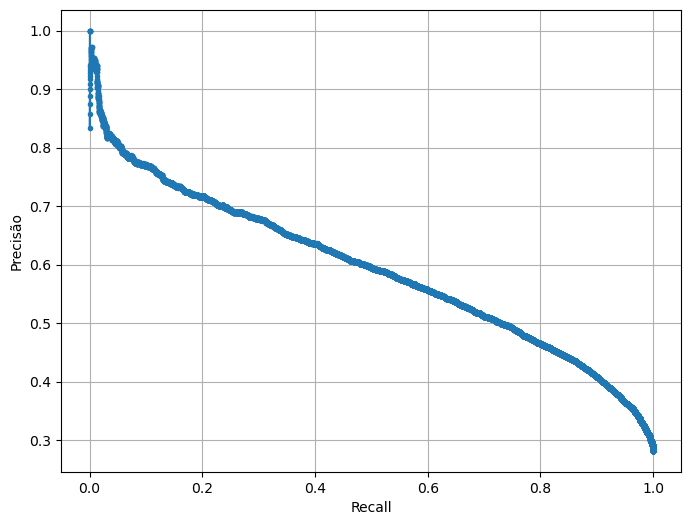

In [26]:
data = pd.read_csv('data.csv', delimiter=';')
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

dt = DecisionTreeClassifier(class_weight='balanced', splitter='best', max_depth=8, criterion='gini', random_state=42)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=16*10, algorithm='SAMME', learning_rate=0.645003613327735, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', ada),
    ])

pipeline.fit(X_train, y_train)

for i in range(2001,2025):
    print(i)
    f_X_test = X_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_y_test.reset_index(drop=True, inplace=True)
    

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

for cidade in data['Cidade'].unique():
    print(cidade)
    f_X_test = X_test.copy().loc[X_test['Cidade'] == cidade]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[X_test['Cidade'] == cidade]
    f_y_test.reset_index(drop=True, inplace=True)

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

y_pred = pipeline.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

FP = np.sum((y_pred == 1) & (y_true == 0))
VP = np.sum((y_pred == 1) & (y_true == 1))
FN = np.sum((y_pred == 0) & (y_true == 1))
VN = np.sum((y_pred == 0) & (y_true == 0))

print(f"VP: {VP} - VN: {VN} - FP: {FP} - FN: {FN}")
print(f"{VP}\t{VN}\t{FP}\t{FN}")
print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

class_labels = pipeline.classes_
class_index = np.where(class_labels == "Sim")[0][0]

y_probs = pipeline.predict_proba(X_test.copy())[:, class_index]

y_true  = (y_test.copy() == 'Sim').astype(int)

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

In [23]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

    

def objective(trial):
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'sag', 'saga'])
    tol = trial.suggest_float('tol', 1e-5, 1e-3)
    c = trial.suggest_float('C', 0.25, 4)
    intercept_scaling = trial.suggest_int('intercept_scaling', 0.25, 4)

    pipeline = Pipeline(steps=[
        ('manual',ManualFeatureSelectorTransformer()),
        ('imputer',ImputerTransformer()),
        ('date', DateTransformer()),
        ('scaler', RobustScalerTransformer()),
        ('os', RandomOverSampler(random_state=42)),
        ('model', LogisticRegression(class_weight='balanced', max_iter=6000, random_state=42, solver=solver, tol=tol, C=c, intercept_scaling=intercept_scaling)),
        ])

    X_train_2, X_val, y_train_2, y_val = train_test_split(X_train.copy(), y_train.copy(), stratify=y_train, test_size=0.1875, random_state=42)
    pipeline.fit(X_train_2, y_train_2)

    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    y_true  = (y_val == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    #score = cross_val_score(pipeline, X.copy(), y.copy(), n_jobs=-1, cv=5).mean()
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  Value: {trial.value}")
    print("  Params:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    print()

print("\n\n\nBest trial:")
trial = study.best_trial

print(f" Val Value: {trial.value}")
print(" Val Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=6000, random_state=42, solver=trial.params['solver'], tol=trial.params['tol'], C=trial.params['C'], intercept_scaling=trial.params['intercept_scaling'])),
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")


256311
240452


[I 2024-08-06 12:44:44,188] A new study created in memory with name: no-name-6443eb80-9255-4433-b16c-3e762f331ff6
[I 2024-08-06 12:45:16,185] Trial 0 finished with value: 0.5591821561338289 and parameters: {'solver': 'sag', 'tol': 0.00018349121905260687, 'C': 3.4709787079963625, 'intercept_scaling': 0}. Best is trial 0 with value: 0.5591821561338289.


Accuracy: 0,6905693857314337 | Precision:0,4640014806588932 | Recall:0,7034889159105789 | F1-score:0,5591821561338289


[I 2024-08-06 12:45:23,318] Trial 1 finished with value: 0.5593901078467832 and parameters: {'solver': 'newton-cg', 'tol': 0.000927717693242996, 'C': 3.47961440831626, 'intercept_scaling': 3}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6908303324461145 | Precision:0,4642879190073461 | Recall:0,7034889159105789 | F1-score:0,5593901078467832


[I 2024-08-06 12:45:30,100] Trial 2 finished with value: 0.5590662404282208 and parameters: {'solver': 'newton-cg', 'tol': 2.2816254932788516e-05, 'C': 3.1421721451772804, 'intercept_scaling': 4}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6904650070455612 | Precision:0,4638825488865585 | Recall:0,7033953792909924 | F1-score:0,5590662404282208


[I 2024-08-06 12:46:28,368] Trial 3 finished with value: 0.5590782382456793 and parameters: {'solver': 'saga', 'tol': 0.00017429403957264808, 'C': 3.5060500356656443, 'intercept_scaling': 3}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6904389123740932 | Precision:0,46385839398051065 | Recall:0,7034889159105789 | F1-score:0,5590782382456793


[I 2024-08-06 12:46:45,367] Trial 4 finished with value: 0.5579513824457228 and parameters: {'solver': 'sag', 'tol': 0.000959814752053622, 'C': 1.0477465527528302, 'intercept_scaling': 4}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6891863681436251 | Precision:0,4624707764242648 | Recall:0,7031147694322327 | F1-score:0,5579513824457228


[I 2024-08-06 12:46:52,043] Trial 5 finished with value: 0.557990935433539 and parameters: {'solver': 'newton-cg', 'tol': 0.0006849472334549505, 'C': 1.050020284496643, 'intercept_scaling': 3}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6895255988727101 | Precision:0,4628088987489986 | Recall:0,7024600130951267 | F1-score:0,557990935433539


[I 2024-08-06 12:47:00,028] Trial 6 finished with value: 0.5573272026105014 and parameters: {'solver': 'lbfgs', 'tol': 5.9335211123796255e-05, 'C': 0.4883782642115002, 'intercept_scaling': 0}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6884818120139867 | Precision:0,4616944154328193 | Recall:0,7029276961930596 | F1-score:0,5573272026105014


[I 2024-08-06 12:47:06,740] Trial 7 finished with value: 0.5579169912095249 and parameters: {'solver': 'newton-cg', 'tol': 0.0006565883505690585, 'C': 0.7611356251900885, 'intercept_scaling': 1}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6889776107718804 | Precision:0,4622618315918869 | Recall:0,7034889159105789 | F1-score:0,5579169912095249


[I 2024-08-06 12:47:12,491] Trial 8 finished with value: 0.5587896360730085 and parameters: {'solver': 'newton-cg', 'tol': 0.000722631449572416, 'C': 2.697228367034069, 'intercept_scaling': 0}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6902823443452847 | Precision:0,4636644046884639 | Recall:0,7030212328126462 | F1-score:0,5587896360730085


[I 2024-08-06 12:47:50,848] Trial 9 finished with value: 0.5583677110045713 and parameters: {'solver': 'saga', 'tol': 0.0005457124190197167, 'C': 1.955841389746151, 'intercept_scaling': 3}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,6899170189447315 | Precision:0,46324617661568823 | Recall:0,7026470863342998 | F1-score:0,5583677110045713


[I 2024-08-06 12:47:59,251] Trial 10 finished with value: 0.5585043116265239 and parameters: {'solver': 'lbfgs', 'tol': 0.0009953303937728355, 'C': 2.1021795436111925, 'intercept_scaling': 2}. Best is trial 1 with value: 0.5593901078467832.


Accuracy: 0,690047492302072 | Precision:0,46339357305865664 | Recall:0,7027406229538864 | F1-score:0,5585043116265239


[I 2024-08-06 12:48:24,716] Trial 11 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.0003063734779484168, 'C': 3.8205829190286122, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:48:49,030] Trial 12 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.0003799687262916069, 'C': 3.9809106968607106, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:49:15,846] Trial 13 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.0003406851830005486, 'C': 3.977430023114389, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:49:40,068] Trial 14 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.0003926010849743067, 'C': 3.979619678378826, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:50:06,279] Trial 15 finished with value: 0.5586409427158843 and parameters: {'solver': 'sag', 'tol': 0.00035252064500342333, 'C': 2.732684764984845, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6901779656594124 | Precision:0,4635410240592227 | Recall:0,7028341595734731 | F1-score:0,5586409427158843


[I 2024-08-06 12:50:27,957] Trial 16 finished with value: 0.5582103972353313 and parameters: {'solver': 'sag', 'tol': 0.00047909824873778803, 'C': 1.5579940676996982, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,689760450915923 | Precision:0,46307028360049324 | Recall:0,7025535497147133 | F1-score:0,5582103972353313


[I 2024-08-06 12:50:52,675] Trial 17 finished with value: 0.5587480950079917 and parameters: {'solver': 'sag', 'tol': 0.00027525493771801717, 'C': 2.7538616495830777, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6902301550023485 | Precision:0,46360720453984705 | Recall:0,7030212328126462 | F1-score:0,5587480950079917


[I 2024-08-06 12:51:13,371] Trial 18 finished with value: 0.5587480950079917 and parameters: {'solver': 'sag', 'tol': 0.0005230259906469659, 'C': 3.1506127234338157, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6902301550023485 | Precision:0,46360720453984705 | Recall:0,7030212328126462 | F1-score:0,5587480950079917


[I 2024-08-06 12:52:11,523] Trial 19 finished with value: 0.559087022787257 and parameters: {'solver': 'saga', 'tol': 0.00019707726026333777, 'C': 3.731252356820868, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6904911017170294 | Precision:0,4639111659469463 | Recall:0,7033953792909924 | F1-score:0,559087022787257


[I 2024-08-06 12:52:22,625] Trial 20 finished with value: 0.5585873605947955 and parameters: {'solver': 'lbfgs', 'tol': 0.000807171965523628, 'C': 2.4683248199548666, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6901518709879443 | Precision:0,46350792769449073 | Recall:0,7027406229538864 | F1-score:0,5585873605947955


[I 2024-08-06 12:52:53,294] Trial 21 finished with value: 0.5594020748893764 and parameters: {'solver': 'sag', 'tol': 0.0003850491343451721, 'C': 3.9271082303080886, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908042377746464 | Precision:0,4642636711517097 | Recall:0,7035824525301656 | F1-score:0,5594020748893764


[I 2024-08-06 12:53:29,140] Trial 22 finished with value: 0.5588847583643123 and parameters: {'solver': 'sag', 'tol': 0.00029297946998024647, 'C': 3.136909310518237, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6903606283596889 | Precision:0,46375470417669196 | Recall:0,7031147694322327 | F1-score:0,5588847583643123


[I 2024-08-06 12:53:56,769] Trial 23 finished with value: 0.5591405843431715 and parameters: {'solver': 'sag', 'tol': 0.00044241750828678513, 'C': 3.685913185497798, 'intercept_scaling': 0}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6905171963884975 | Precision:0,46394423539571894 | Recall:0,7034889159105789 | F1-score:0,5591405843431715


[I 2024-08-06 12:54:25,568] Trial 24 finished with value: 0.5593901078467832 and parameters: {'solver': 'sag', 'tol': 0.00026885507045000854, 'C': 3.9908601431223234, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,4642879190073461 | Recall:0,7034889159105789 | F1-score:0,5593901078467832


[I 2024-08-06 12:54:50,528] Trial 25 finished with value: 0.5587688647684187 and parameters: {'solver': 'sag', 'tol': 0.0005808149261173838, 'C': 3.2373458678631346, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6902562496738166 | Precision:0,46363580284991673 | Recall:0,7030212328126462 | F1-score:0,5587688647684187


[I 2024-08-06 12:55:23,841] Trial 26 finished with value: 0.5593693057156669 and parameters: {'solver': 'sag', 'tol': 0.0001066926022671845, 'C': 3.6333796533724687, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908042377746464 | Precision:0,46425925925925926 | Recall:0,7034889159105789 | F1-score:0,5593693057156669


[I 2024-08-06 12:55:51,978] Trial 27 finished with value: 0.558971118462625 and parameters: {'solver': 'sag', 'tol': 0.0003376607367599031, 'C': 3.341864136654177, 'intercept_scaling': 0}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,690386723031157 | Precision:0,4637922526523563 | Recall:0,7033018426714058 | F1-score:0,558971118462625


[I 2024-08-06 12:55:58,563] Trial 28 finished with value: 0.5589591078066914 and parameters: {'solver': 'lbfgs', 'tol': 0.00045743343340892543, 'C': 2.9111052860470252, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6904128177026251 | Precision:0,46381639829724225 | Recall:0,7032083060518193 | F1-score:0,5589591078066914


[I 2024-08-06 12:56:30,032] Trial 29 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.00017856625320157932, 'C': 3.7024448655442472, 'intercept_scaling': 0}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:57:18,919] Trial 30 finished with value: 0.5585786500148677 and parameters: {'solver': 'saga', 'tol': 0.00024310809017748963, 'C': 2.473354069709207, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6900996816450081 | Precision:0,46345525195830506 | Recall:0,7028341595734731 | F1-score:0,5585786500148677


[I 2024-08-06 12:57:55,933] Trial 31 finished with value: 0.5592029443473734 and parameters: {'solver': 'sag', 'tol': 0.00040918205936561937, 'C': 3.815777021803408, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6905954804029018 | Precision:0,4640301085883514 | Recall:0,7034889159105789 | F1-score:0,5592029443473734


[I 2024-08-06 12:58:26,125] Trial 32 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.00034315553125227583, 'C': 3.987755627794791, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 12:58:55,110] Trial 33 finished with value: 0.5590782382456793 and parameters: {'solver': 'sag', 'tol': 0.0003932518895198183, 'C': 3.4596892481798927, 'intercept_scaling': 0}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6904389123740932 | Precision:0,46385839398051065 | Recall:0,7034889159105789 | F1-score:0,5590782382456793


[I 2024-08-06 12:59:30,478] Trial 34 finished with value: 0.5594228766919529 and parameters: {'solver': 'sag', 'tol': 0.0001205212424856178, 'C': 3.4890584318987297, 'intercept_scaling': 1}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 13:00:00,520] Trial 35 finished with value: 0.559087022787257 and parameters: {'solver': 'sag', 'tol': 0.0006022050571064933, 'C': 3.997158889640567, 'intercept_scaling': 3}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6904911017170294 | Precision:0,4639111659469463 | Recall:0,7033953792909924 | F1-score:0,559087022787257


[I 2024-08-06 13:00:32,262] Trial 36 finished with value: 0.5592029443473734 and parameters: {'solver': 'sag', 'tol': 0.00022586133581490385, 'C': 3.5683710056746354, 'intercept_scaling': 3}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6905954804029018 | Precision:0,4640301085883514 | Recall:0,7034889159105789 | F1-score:0,5592029443473734


[I 2024-08-06 13:00:40,833] Trial 37 finished with value: 0.5594228766919529 and parameters: {'solver': 'newton-cg', 'tol': 0.0003046300909511771, 'C': 3.3210531218566235, 'intercept_scaling': 4}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529


[I 2024-08-06 13:01:34,485] Trial 38 finished with value: 0.5587896360730085 and parameters: {'solver': 'saga', 'tol': 0.00043666988606395766, 'C': 3.802142683101827, 'intercept_scaling': 2}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6902823443452847 | Precision:0,4636644046884639 | Recall:0,7030212328126462 | F1-score:0,5587896360730085


[I 2024-08-06 13:02:06,886] Trial 39 finished with value: 0.5587480950079917 and parameters: {'solver': 'sag', 'tol': 0.0003579629126107744, 'C': 2.9553521897931443, 'intercept_scaling': 0}. Best is trial 11 with value: 0.5594228766919529.


Accuracy: 0,6902301550023485 | Precision:0,46360720453984705 | Recall:0,7030212328126462 | F1-score:0,5587480950079917


[I 2024-08-06 13:02:16,218] Trial 40 finished with value: 0.5594436800416497 and parameters: {'solver': 'newton-cg', 'tol': 0.0001432961878651273, 'C': 3.457843066825297, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908564271175825 | Precision:0,464320987654321 | Recall:0,7035824525301656 | F1-score:0,5594436800416497


[I 2024-08-06 13:02:24,277] Trial 41 finished with value: 0.559431716750967 and parameters: {'solver': 'newton-cg', 'tol': 0.00013032012833535798, 'C': 3.79689967756346, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908825217890506 | Precision:0,46434524912020747 | Recall:0,7034889159105789 | F1-score:0,559431716750967


[I 2024-08-06 13:02:31,707] Trial 42 finished with value: 0.5593693057156669 and parameters: {'solver': 'newton-cg', 'tol': 2.557677273612815e-05, 'C': 3.4728881809539773, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908042377746464 | Precision:0,46425925925925926 | Recall:0,7034889159105789 | F1-score:0,5593693057156669


[I 2024-08-06 13:02:40,285] Trial 43 finished with value: 0.559410911525159 and parameters: {'solver': 'newton-cg', 'tol': 0.00011504257792647869, 'C': 3.7608980582736424, 'intercept_scaling': 4}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908564271175825 | Precision:0,4643165822941104 | Recall:0,7034889159105789 | F1-score:0,559410911525159


[I 2024-08-06 13:02:48,012] Trial 44 finished with value: 0.5593365316672245 and parameters: {'solver': 'newton-cg', 'tol': 0.0001629007305125354, 'C': 3.589226033857874, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908042377746464 | Precision:0,46425484627731817 | Recall:0,7033953792909924 | F1-score:0,5593365316672245


[I 2024-08-06 13:02:56,684] Trial 45 finished with value: 0.5582933809045973 and parameters: {'solver': 'newton-cg', 'tol': 1.405714519507213e-05, 'C': 1.566100521139095, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6898648296017953 | Precision:0,4631845091267884 | Recall:0,7025535497147133 | F1-score:0,5582933809045973


[I 2024-08-06 13:03:06,266] Trial 46 finished with value: 0.5590662404282208 and parameters: {'solver': 'newton-cg', 'tol': 0.00022076223116599886, 'C': 2.9876518939159245, 'intercept_scaling': 4}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6904650070455612 | Precision:0,4638825488865585 | Recall:0,7033953792909924 | F1-score:0,5590662404282208


[I 2024-08-06 13:03:14,553] Trial 47 finished with value: 0.556514651946801 and parameters: {'solver': 'newton-cg', 'tol': 6.764503142252996e-05, 'C': 0.3340033609594424, 'intercept_scaling': 3}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6876206878555399 | Precision:0,4607410133725923 | Recall:0,7025535497147133 | F1-score:0,556514651946801


[I 2024-08-06 13:03:22,304] Trial 48 finished with value: 0.559431716750967 and parameters: {'solver': 'newton-cg', 'tol': 0.00031318133685014993, 'C': 3.7980292106485396, 'intercept_scaling': 2}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908825217890506 | Precision:0,46434524912020747 | Recall:0,7034889159105789 | F1-score:0,559431716750967


[I 2024-08-06 13:03:31,257] Trial 49 finished with value: 0.5594228766919529 and parameters: {'solver': 'newton-cg', 'tol': 0.0001410727898525988, 'C': 3.3753456214532225, 'intercept_scaling': 2}. Best is trial 40 with value: 0.5594436800416497.


Accuracy: 0,6908303324461145 | Precision:0,46429232763409667 | Recall:0,7035824525301656 | F1-score:0,5594228766919529
Trial 0:
  Value: 0.5591821561338289
  Params:
    solver: sag
    tol: 0.00018349121905260687
    C: 3.4709787079963625
    intercept_scaling: 0

Trial 1:
  Value: 0.5593901078467832
  Params:
    solver: newton-cg
    tol: 0.000927717693242996
    C: 3.47961440831626
    intercept_scaling: 3

Trial 2:
  Value: 0.5590662404282208
  Params:
    solver: newton-cg
    tol: 2.2816254932788516e-05
    C: 3.1421721451772804
    intercept_scaling: 4

Trial 3:
  Value: 0.5590782382456793
  Params:
    solver: saga
    tol: 0.00017429403957264808
    C: 3.5060500356656443
    intercept_scaling: 3

Trial 4:
  Value: 0.5579513824457228
  Params:
    solver: sag
    tol: 0.000959814752053622
    C: 1.0477465527528302
    intercept_scaling: 4

Trial 5:
  Value: 0.557990935433539
  Params:
    solver: newton-cg
    tol: 0.0006849472334549505
    C: 1.050020284496643
    intercept_s

2001
Test: Accuracy: 0,4666666666666667 | Precision:0,15384615384615385 | Recall:0,46153846153846156 | F1-score:0,23076923076923075
,46666666666666	0,15384615384615385	0,46153846153846156	0,23076923076923075
2002
Test: Accuracy: 0,6058091286307054 | Precision:0,376 | Recall:0,734375 | F1-score:0,49735449735449744
,60580912863070	0,376	0,734375	0,49735449735449744
2003
Test: Accuracy: 0,6571428571428571 | Precision:0,3564356435643564 | Recall:0,6545454545454545 | F1-score:0,4615384615384615
,65714285714285	0,3564356435643564	0,6545454545454545	0,4615384615384615
2004
Test: Accuracy: 0,7004830917874396 | Precision:0,34210526315789475 | Recall:0,6842105263157895 | F1-score:0,45614035087719296
,70048309178743	0,34210526315789475	0,6842105263157895	0,45614035087719296
2005
Test: Accuracy: 0,6325581395348837 | Precision:0,3564356435643564 | Recall:0,72 | F1-score:0,4768211920529801
,63255813953488	0,3564356435643564	0,72	0,4768211920529801
2006
Test: Accuracy: 0,6757425742574258 | Precision:

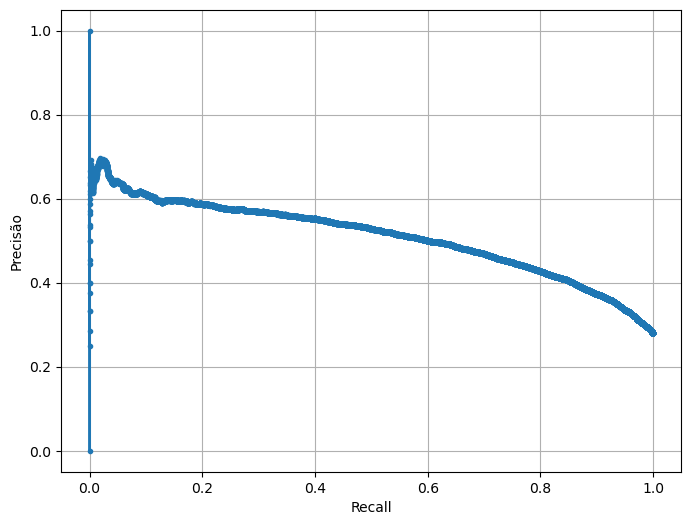

In [27]:
data = pd.read_csv('data.csv', delimiter=';')
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=6000, random_state=42, solver='newton-cg', tol=0.0001432961878651273, C=3.457843066825297, intercept_scaling=3)),
    ])

pipeline.fit(X_train, y_train)

for i in range(2001,2025):
    print(i)
    f_X_test = X_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_y_test.reset_index(drop=True, inplace=True)
    

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

for cidade in data['Cidade'].unique():
    print(cidade)
    f_X_test = X_test.copy().loc[X_test['Cidade'] == cidade]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[X_test['Cidade'] == cidade]
    f_y_test.reset_index(drop=True, inplace=True)

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

y_pred = pipeline.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

FP = np.sum((y_pred == 1) & (y_true == 0))
VP = np.sum((y_pred == 1) & (y_true == 1))
FN = np.sum((y_pred == 0) & (y_true == 1))
VN = np.sum((y_pred == 0) & (y_true == 0))

print(f"VP: {VP} - VN: {VN} - FP: {FP} - FN: {FN}")
print(f"{VP}\t{VN}\t{FP}\t{FN}")
print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

class_labels = pipeline.classes_
class_index = np.where(class_labels == "Sim")[0][0]

y_probs = pipeline.predict_proba(X_test.copy())[:, class_index]

y_true  = (y_test.copy() == 'Sim').astype(int)

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

In [29]:
data = pd.read_csv('data.csv', delimiter=';')

print(data.shape[0])
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers

data.reset_index(drop=True, inplace=True)
print(data.shape[0])

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

    

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 15, 31)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 50)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0, 0.1)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0, 0.01)
    n_estimators = trial.suggest_int('n_estimators', 2, 20)

    pipeline = Pipeline(steps=[
        ('manual',ManualFeatureSelectorTransformer()),
        ('imputer',ImputerTransformer()),
        ('date', DateTransformer()),
        ('scaler', RobustScalerTransformer()),
        ('os', RandomOverSampler(random_state=42)),
        ('model', RandomForestClassifier(random_state=42, class_weight='balanced', criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, ccp_alpha=ccp_alpha, n_estimators=n_estimators*50)),
        ])

    X_train_2, X_val, y_train_2, y_val = train_test_split(X_train.copy(), y_train.copy(), stratify=y_train, test_size=0.1875, random_state=42)
    pipeline.fit(X_train_2, y_train_2)

    y_pred = pipeline.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    y_true  = (y_val == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    #score = cross_val_score(pipeline, X.copy(), y.copy(), n_jobs=-1, cv=5).mean()
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  Value: {trial.value}")
    print("  Params:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    print()

print("\n\n\nBest trial:")
trial = study.best_trial

print(f" Val Value: {trial.value}")
print(" Val Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced', criterion=trial.params['criterion'], max_depth=trial.params['max_depth'], min_samples_split=trial.params['min_samples_split'], min_samples_leaf=trial.params['min_samples_leaf'], min_weight_fraction_leaf=trial.params['min_weight_fraction_leaf'], ccp_alpha=trial.params['ccp_alpha'], n_estimators=trial.params['n_estimators']*50)),
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")

256311
240452


[I 2024-08-06 16:03:28,735] A new study created in memory with name: no-name-2d2750fc-7d89-4cbf-8381-7c9cd3b143c7
[I 2024-08-06 16:04:52,267] Trial 0 finished with value: 0.5232132268303743 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 45, 'min_samples_leaf': 29, 'min_weight_fraction_leaf': 0.06188600191648569, 'ccp_alpha': 0.00946936465453477, 'n_estimators': 9}. Best is trial 0 with value: 0.5232132268303743.


Accuracy: 0,6433119357027295 | Precision:0,4171765491155857 | Recall:0,7015246468992611 | F1-score:0,5232132268303743


[I 2024-08-06 16:05:25,072] Trial 1 finished with value: 0.5433542600896861 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.011272618479276254, 'ccp_alpha': 0.0009876284197887742, 'n_estimators': 2}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6678409268827306 | Precision:0,4407006517690875 | Recall:0,7083528201290805 | F1-score:0,5433542600896861


[I 2024-08-06 16:05:45,955] Trial 2 finished with value: 0.5321315780135553 and parameters: {'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.0631352532456998, 'ccp_alpha': 0.00046941348769256267, 'n_estimators': 2}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6559417566932833 | Precision:0,4287021154945683 | Recall:0,701337573660088 | F1-score:0,5321315780135553


[I 2024-08-06 16:08:07,529] Trial 3 finished with value: 0.5326438722386381 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 45, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.051156826135296596, 'ccp_alpha': 0.0027597520563905488, 'n_estimators': 15}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6533061948750065 | Precision:0,4268478322151435 | Recall:0,7081657468899074 | F1-score:0,5326438722386381


[I 2024-08-06 16:08:30,813] Trial 4 finished with value: 0.5261454783297187 and parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 47, 'min_samples_leaf': 29, 'min_weight_fraction_leaf': 0.032693170947939325, 'ccp_alpha': 0.005252560374058651, 'n_estimators': 2}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6408068472417933 | Precision:0,41627628281947926 | Recall:0,7148068468805537 | F1-score:0,5261454783297187


[I 2024-08-06 16:10:56,497] Trial 5 finished with value: 0.5223657186618861 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 28, 'min_samples_leaf': 27, 'min_weight_fraction_leaf': 0.04887198615701105, 'ccp_alpha': 0.009424595416172904, 'n_estimators': 15}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,641955012786389 | Precision:0,41600133067198936 | Recall:0,7018052567580207 | F1-score:0,5223657186618861


[I 2024-08-06 16:12:21,571] Trial 6 finished with value: 0.5212541658165 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 38, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.04645370331308251, 'ccp_alpha': 0.006213641535554566, 'n_estimators': 9}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6326392150722823 | Precision:0,40951108736307773 | Recall:0,7168646525114583 | F1-score:0,5212541658165


[I 2024-08-06 16:13:04,323] Trial 7 finished with value: 0.5230660792951543 and parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 22, 'min_weight_fraction_leaf': 0.06473737786814122, 'ccp_alpha': 0.00821309660310172, 'n_estimators': 5}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6468608110223892 | Precision:0,4196448767247229 | Recall:0,6941352539519222 | F1-score:0,5230660792951543


[I 2024-08-06 16:15:29,593] Trial 8 finished with value: 0.5219915312115831 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.07368739139944926, 'ccp_alpha': 0.008407602624127463, 'n_estimators': 18}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6347267887897291 | Precision:0,41106868176195344 | Recall:0,7149003835001403 | F1-score:0,5219915312115831


[I 2024-08-06 16:17:46,537] Trial 9 finished with value: 0.5264398087185529 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 27, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.04873496970938565, 'ccp_alpha': 0.006091475106908496, 'n_estimators': 14}. Best is trial 1 with value: 0.5433542600896861.


Accuracy: 0,6433902197171337 | Precision:0,4181207684262674 | Recall:0,7105041623795716 | F1-score:0,5264398087185529


[I 2024-08-06 16:20:39,110] Trial 10 finished with value: 0.5772167440432798 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.0005104397784947787, 'ccp_alpha': 9.513843024125824e-06, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,712462815093158 | Precision:0,4893312516263336 | Recall:0,7035824525301656 | F1-score:0,5772167440432798


[I 2024-08-06 16:22:50,577] Trial 11 finished with value: 0.5655263836211658 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.0007647394354612109, 'ccp_alpha': 0.0001302078590544965, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6921089713480507 | Precision:0,4663549131543787 | Recall:0,7182677018052568 | F1-score:0,5655263836211658


[I 2024-08-06 16:27:53,399] Trial 12 finished with value: 0.5351267386853068 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.00010241788937819451, 'ccp_alpha': 0.002446289334657578, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6563853661082407 | Precision:0,42977034306776296 | Recall:0,7089140398466 | F1-score:0,5351267386853068


[I 2024-08-06 16:28:45,324] Trial 13 finished with value: 0.5294532627865961 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.09867405398250124, 'ccp_alpha': 0.002421360518668081, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6518970826157299 | Precision:0,4249957528738887 | Recall:0,7019923299971939 | F1-score:0,5294532627865961


[I 2024-08-06 16:31:01,394] Trial 14 finished with value: 0.5442476279808074 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 11, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.02137624893064797, 'ccp_alpha': 0.00027487145736847116, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6703460153436668 | Precision:0,44297627437162324 | Recall:0,7055467215414835 | F1-score:0,5442476279808074


[I 2024-08-06 16:32:45,317] Trial 15 finished with value: 0.5322006415453489 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.0037571302010664907, 'ccp_alpha': 0.003745916299690892, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6536976149470278 | Precision:0,4270279443375948 | Recall:0,7061079412590029 | F1-score:0,5322006415453489


[I 2024-08-06 16:35:23,171] Trial 16 finished with value: 0.5379280913261496 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 18, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.024111858167188735, 'ccp_alpha': 0.0015027499252763092, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6609519336151558 | Precision:0,43395685104429654 | Recall:0,7074174539332149 | F1-score:0,5379280913261496


[I 2024-08-06 16:37:10,538] Trial 17 finished with value: 0.5480250692318904 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.014549729488113615, 'ccp_alpha': 4.9100089886727795e-05, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6763216951098585 | Precision:0,44887482838894527 | Recall:0,7033953792909924 | F1-score:0,5480250692318904


[I 2024-08-06 16:38:00,018] Trial 18 finished with value: 0.5277364432294009 and parameters: {'criterion': 'gini', 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.03217964237551895, 'ccp_alpha': 0.0038916464610290243, 'n_estimators': 4}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6438860184750274 | Precision:0,41881797209711086 | Recall:0,7132167243475821 | F1-score:0,5277364432294009


[I 2024-08-06 16:39:49,003] Trial 19 finished with value: 0.5404284232736115 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 33, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.010479991635268002, 'ccp_alpha': 0.0015502640500995733, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,664657376963624 | Precision:0,43747105141269105 | Recall:0,7067626975961089 | F1-score:0,5404284232736115


[I 2024-08-06 16:42:27,503] Trial 20 finished with value: 0.5281114012184509 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 14, 'min_samples_leaf': 48, 'min_weight_fraction_leaf': 0.08649566909410623, 'ccp_alpha': 0.00348026751263222, 'n_estimators': 20}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6462867282500914 | Precision:0,4205944327381613 | Recall:0,7094752595641194 | F1-score:0,5281114012184509


[I 2024-08-06 16:44:14,534] Trial 21 finished with value: 0.5475022706630335 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.016026526033556934, 'ccp_alpha': 9.300089701374994e-05, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6749908668649862 | Precision:0,4476060354045384 | Recall:0,7047984285847909 | F1-score:0,5475022706630335


[I 2024-08-06 16:45:26,743] Trial 22 finished with value: 0.5381805157593124 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.005360404877069907, 'ccp_alpha': 0.0018043169100403823, 'n_estimators': 4}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6635353060904963 | Precision:0,4360670961750537 | Recall:0,7027406229538864 | F1-score:0,5381805157593124


[I 2024-08-06 16:48:01,319] Trial 23 finished with value: 0.5417295665300841 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.029464005085331806, 'ccp_alpha': 2.3721877347146226e-05, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6672929387819008 | Precision:0,43990426711809 | Recall:0,7048919652043775 | F1-score:0,5417295665300841


[I 2024-08-06 16:49:40,082] Trial 24 finished with value: 0.543498529728179 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 23, 'min_weight_fraction_leaf': 0.017256230452258436, 'ccp_alpha': 0.000935694038586203, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6678148322112625 | Precision:0,440709508578075 | Recall:0,7088205032270134 | F1-score:0,543498529728179


[I 2024-08-06 16:50:50,611] Trial 25 finished with value: 0.5432045625739803 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 21, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.007423553979541829, 'ccp_alpha': 0.001150486289246275, 'n_estimators': 4}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6676843588539221 | Precision:0,440539911566209 | Recall:0,708259283509494 | F1-score:0,5432045625739803


[I 2024-08-06 16:56:29,058] Trial 26 finished with value: 0.5343215104993824 and parameters: {'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.000179924120186968, 'ccp_alpha': 0.0019795280623371657, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6556808099786023 | Precision:0,4290410337791884 | Recall:0,7080722102703209 | F1-score:0,5343215104993824


[I 2024-08-06 16:57:58,825] Trial 27 finished with value: 0.5293335200224026 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.03927546278683412, 'ccp_alpha': 0.004556984069762689, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6491310474401127 | Precision:0,42294568439894836 | Recall:0,7072303806940418 | F1-score:0,5293335200224026


[I 2024-08-06 16:59:30,553] Trial 28 finished with value: 0.5453232735280316 and parameters: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 22, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.013673704233597208, 'ccp_alpha': 0.0007593639783752009, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6713376128594541 | Precision:0,4440329218106996 | Recall:0,7064820877373492 | F1-score:0,5453232735280316


[I 2024-08-06 17:01:30,884] Trial 29 finished with value: 0.5332957110609481 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 22, 'min_weight_fraction_leaf': 0.023777250915785857, 'ccp_alpha': 0.003094176931439847, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6547153071342832 | Precision:0,4280618311533888 | Recall:0,7071368440744551 | F1-score:0,5332957110609481


[I 2024-08-06 17:02:18,889] Trial 30 finished with value: 0.5368664414013872 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.00875865679162365, 'ccp_alpha': 0.0021475355786384274, 'n_estimators': 3}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6602212828140493 | Precision:0,43313820018365473 | Recall:0,7059208680198298 | F1-score:0,5368664414013872


[I 2024-08-06 17:04:12,156] Trial 31 finished with value: 0.5473233093629695 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.016807338903668506, 'ccp_alpha': 3.71085836608489e-05, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6747560148217734 | Precision:0,44736685863563497 | Recall:0,7047984285847909 | F1-score:0,5473233093629695


[I 2024-08-06 17:06:07,104] Trial 32 finished with value: 0.5441409058231489 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.015876786386427196, 'ccp_alpha': 0.0007860946774179562, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6690673764417306 | Precision:0,44188218810204916 | Recall:0,7079786736507343 | F1-score:0,5441409058231489


[I 2024-08-06 17:08:03,840] Trial 33 finished with value: 0.554185927067283 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 12, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.007756855904647806, 'ccp_alpha': 3.1314101639982054e-06, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6828975523198163 | Precision:0,4559063197923583 | Recall:0,7064820877373492 | F1-score:0,554185927067283


[I 2024-08-06 17:09:31,312] Trial 34 finished with value: 0.5422273117663899 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 12, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.006696477953716414, 'ccp_alpha': 0.0012213563119752794, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6661969625802411 | Precision:0,4391120384860604 | Recall:0,7086334299878403 | F1-score:0,5422273117663899


[I 2024-08-06 17:12:57,051] Trial 35 finished with value: 0.5481556634538735 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.00041739483123800667, 'ccp_alpha': 0.0006091893285899925, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6745994467929649 | Precision:0,4473886555864435 | Recall:0,7075109905528014 | F1-score:0,5481556634538735


[I 2024-08-06 17:14:03,655] Trial 36 finished with value: 0.5445890880242328 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0023046319608048082, 'ccp_alpha': 0.0008164506494546161, 'n_estimators': 3}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6704503940295392 | Precision:0,4431338028169014 | Recall:0,706295014498176 | F1-score:0,5445890880242328


[I 2024-08-06 17:14:26,765] Trial 37 finished with value: 0.5368620037807182 and parameters: {'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 41, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.03981443181903498, 'ccp_alpha': 0.0006287174609787399, 'n_estimators': 2}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6611606909869004 | Precision:0,4338752450132595 | Recall:0,7039565990085118 | F1-score:0,5368620037807182


[I 2024-08-06 17:16:39,534] Trial 38 finished with value: 0.5404730476971924 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 11, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.010418958465933202, 'ccp_alpha': 0.0014882625527558079, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6638745368195814 | Precision:0,43685121107266434 | Recall:0,7085398933682536 | F1-score:0,5404730476971924


[I 2024-08-06 17:17:31,971] Trial 39 finished with value: 0.527448869752422 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 24, 'min_samples_leaf': 32, 'min_weight_fraction_leaf': 0.056188900642480215, 'ccp_alpha': 0.0027695061228975968, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6448776159908147 | Precision:0,4194278771813563 | Recall:0,710410625759985 | F1-score:0,527448869752422


[I 2024-08-06 17:19:12,707] Trial 40 finished with value: 0.5235372659111917 and parameters: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_split': 31, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.0001774396700932741, 'ccp_alpha': 0.0074569775425428605, 'n_estimators': 3}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6368404571786441 | Precision:0,4128955610757101 | Recall:0,7151809933589001 | F1-score:0,5235372659111917


[I 2024-08-06 17:20:48,634] Trial 41 finished with value: 0.5488913122500909 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 9, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.010413456274515733, 'ccp_alpha': 0.00048255821981794175, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,67616512708105 | Precision:0,4488970806825614 | Recall:0,7062014778785894 | F1-score:0,5488913122500909


[I 2024-08-06 17:23:09,495] Trial 42 finished with value: 0.547551891227309 and parameters: {'criterion': 'entropy', 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.005832644662910838, 'ccp_alpha': 0.0006496993829057015, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6735034705913052 | Precision:0,4463243530035961 | Recall:0,7081657468899074 | F1-score:0,547551891227309


[I 2024-08-06 17:24:45,482] Trial 43 finished with value: 0.5488297601281258 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.01026563357124412, 'ccp_alpha': 0.00041738459026025016, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6765565471530713 | Precision:0,44923131927064713 | Recall:0,7051725750631372 | F1-score:0,5488297601281258


[I 2024-08-06 17:25:49,620] Trial 44 finished with value: 0.5390274537950834 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.026832440871308018, 'ccp_alpha': 0.001300817008982648, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6648139449924325 | Precision:0,4372889251193665 | Recall:0,7024600130951267 | F1-score:0,5390274537950834


[I 2024-08-06 17:26:47,426] Trial 45 finished with value: 0.5243708187320804 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.0205010737152639, 'ccp_alpha': 0.009892439784749843, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6493658994833255 | Precision:0,4218109339407745 | Recall:0,6928257412777102 | F1-score:0,5243708187320804


[I 2024-08-06 17:29:06,537] Trial 46 finished with value: 0.5493381686310064 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.009646828516659156, 'ccp_alpha': 0.0003838623862834137, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6757215176660926 | Precision:0,44859038142620233 | Recall:0,7084463567486671 | F1-score:0,5493381686310064


[I 2024-08-06 17:31:04,514] Trial 47 finished with value: 0.5334460530487161 and parameters: {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.03853866743525268, 'ccp_alpha': 0.001874197448286357, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,654376076405198 | Precision:0,4278449542321166 | Recall:0,708259283509494 | F1-score:0,5334460530487161


[I 2024-08-06 17:32:58,799] Trial 48 finished with value: 0.5278441972485012 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 50, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.01986430309642839, 'ccp_alpha': 0.005691587471166684, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6444601012473253 | Precision:0,41924474292634595 | Recall:0,712374894771303 | F1-score:0,5278441972485012


[I 2024-08-06 17:36:11,877] Trial 49 finished with value: 0.5256717931384148 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.012535417313004907, 'ccp_alpha': 0.007130049519267672, 'n_estimators': 15}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6338134752883461 | Precision:0,41155922515084153 | Recall:0,7273407539051538 | F1-score:0,5256717931384148


[I 2024-08-06 17:38:57,810] Trial 50 finished with value: 0.55019452423372 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 0.006885109012493784, 'ccp_alpha': 0.0003776014355048999, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6771828192683054 | Precision:0,45003568879371875 | Recall:0,7076980637919745 | F1-score:0,55019452423372


[I 2024-08-06 17:42:01,747] Trial 51 finished with value: 0.550088958280382 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.004614649395738293, 'ccp_alpha': 0.0004622400790416859, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6766609258389437 | Precision:0,4495548961424332 | Recall:0,7085398933682536 | F1-score:0,550088958280382


[I 2024-08-06 17:45:14,165] Trial 52 finished with value: 0.5455395683453238 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 17, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.0050054754734172, 'ccp_alpha': 0.0010779834860425823, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6703199206721987 | Precision:0,44321702028172305 | Recall:0,7092881863249462 | F1-score:0,5455395683453238


[I 2024-08-06 17:48:49,551] Trial 53 finished with value: 0.5515835456862032 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 13, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.0053568203936254395, 'ccp_alpha': 0.00039368061514364765, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6785658368561139 | Precision:0,45151677692353537 | Recall:0,7086334299878403 | F1-score:0,5515835456862032


[I 2024-08-06 17:53:44,371] Trial 54 finished with value: 0.5624445758202778 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.002970518872321179, 'ccp_alpha': 7.040532008498548e-06, 'n_estimators': 16}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6909869004749231 | Precision:0,46485066878397363 | Recall:0,7119072116733701 | F1-score:0,5624445758202778


[I 2024-08-06 17:56:03,521] Trial 55 finished with value: 0.5325326036743541 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.06785843427158884, 'ccp_alpha': 0.00011197660998729891, 'n_estimators': 18}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6567245968373259 | Precision:0,42939828080229225 | Recall:0,7008698905621551 | F1-score:0,5325326036743541


[I 2024-08-06 18:01:07,224] Trial 56 finished with value: 0.5401652186298248 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.0030956363642848264, 'ccp_alpha': 0.00160341349406098, 'n_estimators': 17}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6630134126611346 | Precision:0,4360949807393779 | Recall:0,7094752595641194 | F1-score:0,5401652186298248


[I 2024-08-06 18:03:01,712] Trial 57 finished with value: 0.5304289402029775 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 40, 'min_weight_fraction_leaf': 0.08300588587169595, 'ccp_alpha': 0.0011222471423333017, 'n_estimators': 16}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6534888575752831 | Precision:0,4264271093927678 | Recall:0,7015246468992611 | F1-score:0,5304289402029775


[I 2024-08-06 18:06:09,392] Trial 58 finished with value: 0.5326643744298645 and parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 25, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.006521749040289856, 'ccp_alpha': 0.0022818311406811983, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6524189760450916 | Precision:0,4261972938071978 | Recall:0,7100364792816387 | F1-score:0,5326643744298645


[I 2024-08-06 18:09:09,728] Trial 59 finished with value: 0.5479392309369776 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.013151465213443066, 'ccp_alpha': 0.0003072070888470731, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6754344762799437 | Precision:0,4480770373892885 | Recall:0,7050790384435507 | F1-score:0,5479392309369776


[I 2024-08-06 18:14:57,233] Trial 60 finished with value: 0.5445206709529112 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0027903653427028105, 'ccp_alpha': 0.001002751982903362, 'n_estimators': 19}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6690934711131987 | Precision:0,44198250728862976 | Recall:0,7090075764661865 | F1-score:0,5445206709529112


[I 2024-08-06 18:18:18,781] Trial 61 finished with value: 0.5537775829314628 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 14, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.004233000042280482, 'ccp_alpha': 0.00030867071334433465, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6812796826887949 | Precision:0,4543492596367124 | Recall:0,7089140398466 | F1-score:0,5537775829314628


[I 2024-08-06 18:20:39,389] Trial 62 finished with value: 0.546589259796807 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.018705086366798927, 'ccp_alpha': 0.0001032287089819842, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6739209853347946 | Precision:0,44649949611713796 | Recall:0,7045178187260313 | F1-score:0,546589259796807


[I 2024-08-06 18:24:48,816] Trial 63 finished with value: 0.5615267966120502 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.00324294015360134, 'ccp_alpha': 1.801606415638684e-07, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6906476697458379 | Precision:0,46439495901137895 | Recall:0,7100364792816387 | F1-score:0,5615267966120502


[I 2024-08-06 18:32:18,349] Trial 64 finished with value: 0.5459051724137931 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 17, 'min_samples_leaf': 48, 'min_weight_fraction_leaf': 0.00028638780632001546, 'ccp_alpha': 0.0008472670013717038, 'n_estimators': 16}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6701111633004541 | Precision:0,4431162166890198 | Recall:0,7107847722383313 | F1-score:0,5459051724137931


[I 2024-08-06 18:35:14,513] Trial 65 finished with value: 0.5482990722212115 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 15, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.014421695484291773, 'ccp_alpha': 3.8257193716798055e-06, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6760346537237096 | Precision:0,44867214481362394 | Recall:0,7047984285847909 | F1-score:0,5482990722212115


[I 2024-08-06 18:38:57,511] Trial 66 finished with value: 0.5412520064205457 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 26, 'min_weight_fraction_leaf': 0.003826110614802918, 'ccp_alpha': 0.0014508659512685739, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6643964302489431 | Precision:0,4374423431734317 | Recall:0,7096623328032925 | F1-score:0,5412520064205457


[I 2024-08-06 18:42:21,077] Trial 67 finished with value: 0.5383169615943828 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 19, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.007867097404636997, 'ccp_alpha': 0.0018032231702823837, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6602734721569855 | Precision:0,4335161069225497 | Recall:0,7099429426620522 | F1-score:0,5383169615943828


[I 2024-08-06 18:45:58,041] Trial 68 finished with value: 0.5459242250287025 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 48, 'min_weight_fraction_leaf': 0.002918981535162799, 'ccp_alpha': 0.0008830245393170033, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6697458378999008 | Precision:0,4428147372097084 | Recall:0,7116266018146105 | F1-score:0,5459242250287025


[I 2024-08-06 18:48:56,079] Trial 69 finished with value: 0.544481798792611 and parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 50, 'min_weight_fraction_leaf': 0.022581602381199033, 'ccp_alpha': 4.640021733530635e-07, 'n_estimators': 16}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6711810448306456 | Precision:0,4437308508131039 | Recall:0,7044242821064447 | F1-score:0,544481798792611


[I 2024-08-06 18:52:03,674] Trial 70 finished with value: 0.5212723392904774 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 17, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.012330868256112838, 'ccp_alpha': 0.008985146444674418, 'n_estimators': 15}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6253327070612181 | Precision:0,40500492202476557 | Recall:0,7311757553082031 | F1-score:0,5212723392904774


[I 2024-08-06 18:55:13,222] Trial 71 finished with value: 0.5503974447388479 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 0.007892590301777792, 'ccp_alpha': 0.00038561705000492754, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,676765304524816 | Precision:0,44970344009489915 | Recall:0,7091946497053596 | F1-score:0,5503974447388479


[I 2024-08-06 18:58:19,635] Trial 72 finished with value: 0.5484244001156404 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 49, 'min_weight_fraction_leaf': 0.008536408982152861, 'ccp_alpha': 0.0005963485813445558, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6739209853347946 | Precision:0,4468523644072787 | Recall:0,709755869422879 | F1-score:0,5484244001156404


[I 2024-08-06 19:04:06,402] Trial 73 finished with value: 0.5552761071623837 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 1.871987101761377e-05, 'ccp_alpha': 0.0003308860372709735, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6816189134178801 | Precision:0,454909221213569 | Recall:0,7124684313908896 | F1-score:0,5552761071623837


[I 2024-08-06 19:08:00,197] Trial 74 finished with value: 0.5556162786461181 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 32, 'min_weight_fraction_leaf': 0.0020760346246023642, 'ccp_alpha': 0.0003101477413716765, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6817232921037524 | Precision:0,45506087371687753 | Recall:0,7132167243475821 | F1-score:0,5556162786461181


[I 2024-08-06 19:09:40,585] Trial 75 finished with value: 0.546833249079223 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.0019048231153740362, 'ccp_alpha': 0.0007535387926374023, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,672511873075518 | Precision:0,44533317649826504 | Recall:0,708259283509494 | F1-score:0,546833249079223


[I 2024-08-06 19:11:47,072] Trial 76 finished with value: 0.5429535986208878 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 29, 'min_weight_fraction_leaf': 4.202268774459138e-05, 'ccp_alpha': 0.0012620121493262335, 'n_estimators': 4}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6679192108971348 | Precision:0,44068093044948403 | Recall:0,7070433074548685 | F1-score:0,5429535986208878


[I 2024-08-06 19:14:51,915] Trial 77 finished with value: 0.5283945493532545 and parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.011682401916893858, 'ccp_alpha': 0.004701993243055857, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6441730598611763 | Precision:0,41919552214234757 | Recall:0,7145262370217941 | F1-score:0,5283945493532545


[I 2024-08-06 19:16:12,385] Trial 78 finished with value: 0.5309540636042401 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 31, 'min_weight_fraction_leaf': 0.09783659506819557, 'ccp_alpha': 0.00028511964616060345, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6536193309326236 | Precision:0,4266568232154012 | Recall:0,7027406229538864 | F1-score:0,5309540636042401


[I 2024-08-06 19:18:13,833] Trial 79 finished with value: 0.5428581654199921 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.016447760157381735, 'ccp_alpha': 0.0010275300279152264, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6666927613381347 | Precision:0,43965217391304345 | Recall:0,7093817229445328 | F1-score:0,5428581654199921


[I 2024-08-06 19:22:39,919] Trial 80 finished with value: 0.5486163726232998 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.003286062827596908, 'ccp_alpha': 0.0006467817880948794, 'n_estimators': 15}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6735295652627733 | Precision:0,4465523317279455 | Recall:0,7111589187166776 | F1-score:0,5486163726232998


[I 2024-08-06 19:25:48,053] Trial 81 finished with value: 0.5544684579439253 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.005841394644179688, 'ccp_alpha': 0.00024261970416544748, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6815406294034758 | Precision:0,45470331117897134 | Recall:0,7103170891403985 | F1-score:0,5544684579439253


[I 2024-08-06 19:28:58,466] Trial 82 finished with value: 0.5551932588386151 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.005569012692489146, 'ccp_alpha': 0.0001843610309044899, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6831845937059653 | Precision:0,4563358226933269 | Recall:0,7087269666074268 | F1-score:0,5551932588386151


[I 2024-08-06 19:33:08,176] Trial 83 finished with value: 0.5523070730725603 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.00908001697707348, 'ccp_alpha': 4.770795660057415e-06, 'n_estimators': 17}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6807316945879651 | Precision:0,453600192330809 | Recall:0,7059208680198298 | F1-score:0,5523070730725603


[I 2024-08-06 19:35:16,559] Trial 84 finished with value: 0.5351089588377723 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 24, 'min_weight_fraction_leaf': 0.054510063500886594, 'ccp_alpha': 0.0007260685412235618, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6593079693126663 | Precision:0,4320128787443224 | Recall:0,7028341595734731 | F1-score:0,5351089588377723


[I 2024-08-06 19:38:16,324] Trial 85 finished with value: 0.5542124675893804 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.006189359282317506, 'ccp_alpha': 0.00022131845928245958, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6814623453890716 | Precision:0,45458902468248263 | Recall:0,709755869422879 | F1-score:0,5542124675893804


[I 2024-08-06 19:42:06,678] Trial 86 finished with value: 0.5578266115762917 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.0018567612223915869, 'ccp_alpha': 0.0002349802344907548, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6844371379364333 | Precision:0,4579181174210589 | Recall:0,7134973342063418 | F1-score:0,5578266115762917


[I 2024-08-06 19:45:43,002] Trial 87 finished with value: 0.5371380018409686 and parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.0020026763910683657, 'ccp_alpha': 0.0013973248008168698, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6588382652262408 | Precision:0,4321275989746511 | Recall:0,7095687961837059 | F1-score:0,5371380018409686


[I 2024-08-06 19:52:05,033] Trial 88 finished with value: 0.5490323983474668 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 48, 'min_weight_fraction_leaf': 0.0002742982344364148, 'ccp_alpha': 0.000569376407378806, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6752779082511351 | Precision:0,4481452996509495 | Recall:0,7085398933682536 | F1-score:0,5490323983474668


[I 2024-08-06 19:55:26,417] Trial 89 finished with value: 0.5389631213254944 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.011003842015701848, 'ccp_alpha': 0.0016537240750106605, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6623610458744325 | Precision:0,43530562910095544 | Recall:0,7074174539332149 | F1-score:0,5389631213254944


[I 2024-08-06 19:57:52,753] Trial 90 finished with value: 0.5328972817104477 and parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.04489824765247588, 'ccp_alpha': 0.0026883626670855696, 'n_estimators': 12}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6533844788894108 | Precision:0,426969457906007 | Recall:0,7087269666074268 | F1-score:0,5328972817104477


[I 2024-08-06 20:00:57,646] Trial 91 finished with value: 0.5542062911485004 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.005714014803723968, 'ccp_alpha': 0.00023569421445027725, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6819581441469652 | Precision:0,4550423448855787 | Recall:0,7086334299878403 | F1-score:0,5542062911485004


[I 2024-08-06 20:03:25,545] Trial 92 finished with value: 0.5540866262508217 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.005332609495886296, 'ccp_alpha': 0.00026339348553965227, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6813840613746673 | Precision:0,45449643520460126 | Recall:0,7095687961837059 | F1-score:0,5540866262508217


[I 2024-08-06 20:05:29,273] Trial 93 finished with value: 0.5446918360761537 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 49, 'min_weight_fraction_leaf': 0.0019951915904978168, 'ccp_alpha': 0.0010268908236058783, 'n_estimators': 5}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6686237670267732 | Precision:0,4416279069767442 | Recall:0,7105041623795716 | F1-score:0,5446918360761537


[I 2024-08-06 20:08:25,249] Trial 94 finished with value: 0.5459141299245296 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 11, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.014301509633616065, 'ccp_alpha': 0.000524856000526968, 'n_estimators': 11}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6718595062888159 | Precision:0,4445947535584049 | Recall:0,7070433074548685 | F1-score:0,5459141299245296


[I 2024-08-06 20:11:13,776] Trial 95 finished with value: 0.5448838216192813 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.007100856230081838, 'ccp_alpha': 0.0008510166264135823, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6708418141015604 | Precision:0,44352422907488986 | Recall:0,706295014498176 | F1-score:0,5448838216192813


[I 2024-08-06 20:15:20,185] Trial 96 finished with value: 0.5499089916272297 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.009710751211077236, 'ccp_alpha': 0.00025233604826305905, 'n_estimators': 14}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,677365481968582 | Precision:0,4501460158531498 | Recall:0,7064820877373492 | F1-score:0,5499089916272297


[I 2024-08-06 20:17:29,424] Trial 97 finished with value: 0.5496127695160528 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.004211505044446574, 'ccp_alpha': 0.0005279812330067514, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,676765304524816 | Precision:0,4495598382108018 | Recall:0,706949770835282 | F1-score:0,5496127695160528


[I 2024-08-06 20:20:53,256] Trial 98 finished with value: 0.5609452736318408 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 35, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0016149542551349167, 'ccp_alpha': 0.00019516104786740019, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6868117530400292 | Precision:0,4606188044457795 | Recall:0,7171452623702179 | F1-score:0,5609452736318408


[I 2024-08-06 20:24:07,686] Trial 99 finished with value: 0.5437533608173507 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 39, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0021167953395185676, 'ccp_alpha': 0.0011602393209604463, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6678931162256667 | Precision:0,44082771448500346 | Recall:0,7093817229445328 | F1-score:0,5437533608173507


[I 2024-08-06 20:29:30,054] Trial 100 finished with value: 0.52776334476428 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 33, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.001015706052419222, 'ccp_alpha': 0.0039978667607828535, 'n_estimators': 13}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6442513438755806 | Precision:0,4190780063813401 | Recall:0,7125619680104761 | F1-score:0,52776334476428


[I 2024-08-06 20:32:06,873] Trial 101 finished with value: 0.5556980109161507 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 37, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.005383266735482084, 'ccp_alpha': 0.00019373628837014733, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6834977297635823 | Precision:0,45670761078998073 | Recall:0,7094752595641194 | F1-score:0,5556980109161507


[I 2024-08-06 20:34:56,565] Trial 102 finished with value: 0.5562632696390658 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 42, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.004100125203473796, 'ccp_alpha': 0.00023325823133566806, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6836803924638589 | Precision:0,45696758284717626 | Recall:0,7106912356187447 | F1-score:0,5562632696390658


[I 2024-08-06 20:37:48,085] Trial 103 finished with value: 0.5468005200057778 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 44, 'min_samples_leaf': 49, 'min_weight_fraction_leaf': 0.003858234475548304, 'ccp_alpha': 0.000789986939443516, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,672511873075518 | Precision:0,44532674548555967 | Recall:0,7081657468899074 | F1-score:0,5468005200057778


[I 2024-08-06 20:39:56,108] Trial 104 finished with value: 0.5545171339563864 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 39, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.008117604121661997, 'ccp_alpha': 1.9471280484447504e-06, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6828192683054121 | Precision:0,45588767024225624 | Recall:0,707604527172388 | F1-score:0,5545171339563864


[I 2024-08-06 20:43:20,781] Trial 105 finished with value: 0.54910227520535 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 36, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.00010266908878036425, 'ccp_alpha': 0.0005463542784947673, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6762695057669224 | Precision:0,4490281162693931 | Recall:0,7065756243569358 | F1-score:0,54910227520535


[I 2024-08-06 20:45:57,368] Trial 106 finished with value: 0.5510174418604651 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 43, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.004040878201802196, 'ccp_alpha': 0.00045652351699836244, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6775742393403267 | Precision:0,4505318200724939 | Recall:0,7091946497053596 | F1-score:0,5510174418604651


[I 2024-08-06 20:47:41,861] Trial 107 finished with value: 0.5492644106158509 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 36, 'min_samples_leaf': 40, 'min_weight_fraction_leaf': 0.010844289080481826, 'ccp_alpha': 0.00019542427207034637, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6778090913835395 | Precision:0,450425098790564 | Recall:0,7036759891497522 | F1-score:0,5492644106158509


[I 2024-08-06 20:50:57,826] Trial 108 finished with value: 0.5277126151045132 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 42, 'min_samples_leaf': 48, 'min_weight_fraction_leaf': 0.0018270254850846618, 'ccp_alpha': 0.006571073751078371, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,648008976566985 | Precision:0,4217123670956911 | Recall:0,7048919652043775 | F1-score:0,5277126151045132


[I 2024-08-06 20:53:28,930] Trial 109 finished with value: 0.5427506629398695 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 46, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.018072675316879172, 'ccp_alpha': 0.00090533166660193, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6670319920672199 | Precision:0,4399070577984316 | Recall:0,7083528201290805 | F1-score:0,5427506629398695


[I 2024-08-06 20:54:41,973] Trial 110 finished with value: 0.5469967738427521 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 29, 'min_weight_fraction_leaf': 0.008957577421727234, 'ccp_alpha': 0.0006592570059565326, 'n_estimators': 4}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6738948906633265 | Precision:0,4465553977272727 | Recall:0,7057337947806567 | F1-score:0,5469967738427521


[I 2024-08-06 20:56:51,489] Trial 111 finished with value: 0.5523009495982469 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 40, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 0.007345845854803768, 'ccp_alpha': 0.00024650466327487126, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6801315171441992 | Precision:0,45305290910180357 | Recall:0,7072303806940418 | F1-score:0,5523009495982469


[I 2024-08-06 20:59:36,782] Trial 112 finished with value: 0.5590171773273992 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 37, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.004170862172038783, 'ccp_alpha': 9.964931089758138e-05, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6871509837691143 | Precision:0,46065712900096994 | Recall:0,7107847722383313 | F1-score:0,5590171773273992


[I 2024-08-06 21:02:54,178] Trial 113 finished with value: 0.5523088679451257 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 37, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.003343651587907022, 'ccp_alpha': 0.0004164873522062384, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6789572569281352 | Precision:0,4519952352590828 | Recall:0,7098494060424656 | F1-score:0,5523088679451257


[I 2024-08-06 21:05:31,425] Trial 114 finished with value: 0.5562811857939535 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 30, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.005394036841388857, 'ccp_alpha': 0.00014789085830064862, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6844110432649653 | Precision:0,4576516752188349 | Recall:0,7091011130857731 | F1-score:0,5562811857939535


[I 2024-08-06 21:08:42,276] Trial 115 finished with value: 0.56459828233632 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 30, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.0021013168719253164, 'ccp_alpha': 2.104608911458511e-05, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6944053024372423 | Precision:0,46853017400962604 | Recall:0,7102235525208119 | F1-score:0,56459828233632


[I 2024-08-06 21:11:47,371] Trial 116 finished with value: 0.5613351468588023 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 40, 'min_weight_fraction_leaf': 0.002386347262146543, 'ccp_alpha': 0.00013262115204299026, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6886122853713271 | Precision:0,462390988372093 | Recall:0,7141520905434477 | F1-score:0,5613351468588023


[I 2024-08-06 21:13:43,862] Trial 117 finished with value: 0.5489795918367347 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 30, 'min_samples_leaf': 40, 'min_weight_fraction_leaf': 0.013462538879768745, 'ccp_alpha': 7.86373874477366e-06, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,677052345910965 | Precision:0,4496984894620574 | Recall:0,7045178187260313 | F1-score:0,5489795918367347


[I 2024-08-06 21:15:38,743] Trial 118 finished with value: 0.5454087325870199 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 32, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.011973445066845247, 'ccp_alpha': 0.000657753729355865, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6704503940295392 | Precision:0,4433001755412522 | Recall:0,7086334299878403 | F1-score:0,5454087325870199


[I 2024-08-06 21:18:25,876] Trial 119 finished with value: 0.5449971247843588 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 34, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.003820705609709255, 'ccp_alpha': 0.0009616305979228044, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6696414592140285 | Precision:0,4425377925640577 | Recall:0,7091946497053596 | F1-score:0,5449971247843588


[I 2024-08-06 21:20:12,031] Trial 120 finished with value: 0.5549937715248773 and parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.007863949649068024, 'ccp_alpha': 4.301492361645591e-06, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6830541203486248 | Precision:0,45618261759922907 | Recall:0,7084463567486671 | F1-score:0,5549937715248773


[I 2024-08-06 21:23:10,613] Trial 121 finished with value: 0.5497950150564163 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 25, 'min_samples_leaf': 47, 'min_weight_fraction_leaf': 0.001896006067729486, 'ccp_alpha': 0.0004738146220652681, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6761912217525181 | Precision:0,44908724513987675 | Recall:0,7087269666074268 | F1-score:0,5497950150564163


[I 2024-08-06 21:25:42,803] Trial 122 finished with value: 0.5547290116896918 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.005996077159569924, 'ccp_alpha': 0.00014467563428044935, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6829236469912844 | Precision:0,45601879744547535 | Recall:0,7079786736507343 | F1-score:0,5547290116896918


[I 2024-08-06 21:28:50,742] Trial 123 finished with value: 0.5515191066637662 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.002904751315814167, 'ccp_alpha': 0.0004210988891764924, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6772089139397734 | Precision:0,4502989757859215 | Recall:0,7114395285754372 | F1-score:0,5515191066637662


[I 2024-08-06 21:31:00,270] Trial 124 finished with value: 0.5469213515664568 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 31, 'min_weight_fraction_leaf': 0.00478643201125516, 'ccp_alpha': 0.0006777053911014634, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6731903345336883 | Precision:0,44593239336912277 | Recall:0,7070433074548685 | F1-score:0,5469213515664568


[I 2024-08-06 21:35:24,821] Trial 125 finished with value: 0.5618002195389681 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 3.1774195951173295e-05, 'ccp_alpha': 0.00018419869324161881, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6874902144981995 | Precision:0,4613859005949877 | Recall:0,7180806285660836 | F1-score:0,5618002195389681


[I 2024-08-06 21:37:28,805] Trial 126 finished with value: 0.5522611779329506 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.00941072256943885, 'ccp_alpha': 0.00014935094751718784, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,680418558530348 | Precision:0,453306925939263 | Recall:0,7064820877373492 | F1-score:0,5522611779329506


[I 2024-08-06 21:39:09,138] Trial 127 finished with value: 0.5413533834586466 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 32, 'min_samples_leaf': 41, 'min_weight_fraction_leaf': 0.006901965757707506, 'ccp_alpha': 0.0012954173797413192, 'n_estimators': 6}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6657272584938155 | Precision:0,4385405185915656 | Recall:0,7071368440744551 | F1-score:0,5413533834586466


[I 2024-08-06 21:43:08,570] Trial 128 finished with value: 0.5246063687071948 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 49, 'min_weight_fraction_leaf': 7.291305462749087e-05, 'ccp_alpha': 0.008015760437992653, 'n_estimators': 8}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,648609154010751 | Precision:0,421321236178055 | Recall:0,6949770835282013 | F1-score:0,5246063687071948


[I 2024-08-06 21:44:05,441] Trial 129 finished with value: 0.5323965651834504 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 23, 'min_samples_leaf': 46, 'min_weight_fraction_leaf': 0.07262603083054354, 'ccp_alpha': 0.0007517509694214976, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6561244193935598 | Precision:0,42890629466582814 | Recall:0,7017117201384342 | F1-score:0,5323965651834504


[I 2024-08-06 21:46:37,060] Trial 130 finished with value: 0.5499344882806813 and parameters: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 40, 'min_weight_fraction_leaf': 0.005032119805868332, 'ccp_alpha': 0.0004456374017526438, 'n_estimators': 7}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6773132926256459 | Precision:0,45010425975573426 | Recall:0,7066691609765223 | F1-score:0,5499344882806813


[I 2024-08-06 21:51:28,781] Trial 131 finished with value: 0.5586383601756955 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 38, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0020129357337373855, 'ccp_alpha': 0.00022028149776463123, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6853504514378164 | Precision:0,45889710746286605 | Recall:0,7137779440651015 | F1-score:0,5586383601756955


[I 2024-08-06 21:56:13,482] Trial 132 finished with value: 0.5596538828188018 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 37, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0020657704501976, 'ccp_alpha': 0.00017641462783449024, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6866029956682845 | Precision:0,46023035638907317 | Recall:0,7138714806846881 | F1-score:0,5596538828188018


[I 2024-08-06 22:00:29,883] Trial 133 finished with value: 0.528483422163771 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 38, 'min_samples_leaf': 44, 'min_weight_fraction_leaf': 0.0023546274211061822, 'ccp_alpha': 0.005323460248613226, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6444861959187934 | Precision:0,4194363566445091 | Recall:0,7141520905434477 | F1-score:0,528483422163771


[I 2024-08-06 22:02:40,405] Trial 134 finished with value: 0.5401176977178126 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 42, 'min_weight_fraction_leaf': 0.033462621353764356, 'ccp_alpha': 0.00017779867327997909, 'n_estimators': 10}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,665570690465007 | Precision:0,43814402980730044 | Recall:0,7039565990085118 | F1-score:0,5401176977178126


[I 2024-08-06 22:06:28,947] Trial 135 finished with value: 0.5650264274547755 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 43, 'min_weight_fraction_leaf': 0.0020656687577283233, 'ccp_alpha': 6.856674945104245e-06, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,6950576692239445 | Precision:0,46924265842349305 | Recall:0,7099429426620522 | F1-score:0,5650264274547755


[I 2024-08-06 22:11:30,954] Trial 136 finished with value: 0.575907465185298 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.0006226011950996436, 'ccp_alpha': 1.08321342655768e-06, 'n_estimators': 9}. Best is trial 10 with value: 0.5772167440432798.


Accuracy: 0,709148791816711 | Precision:0,4854082483484061 | Recall:0,7078851370311477 | F1-score:0,575907465185298


[I 2024-08-06 22:17:23,884] Trial 137 finished with value: 0.581103480937722 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 4.046953591801657e-05, 'ccp_alpha': 5.57416789723443e-07, 'n_estimators': 9}. Best is trial 137 with value: 0.581103480937722.


Accuracy: 0,7230311570377329 | Precision:0,5026285246125487 | Recall:0,6886165933963146 | F1-score:0,581103480937722


[I 2024-08-06 22:22:30,766] Trial 138 finished with value: 0.5502484314365503 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.0010419121157222782, 'ccp_alpha': 0.0004995139778958166, 'n_estimators': 10}. Best is trial 137 with value: 0.581103480937722.


Accuracy: 0,6763999791242629 | Precision:0,4493543419026182 | Recall:0,7095687961837059 | F1-score:0,5502484314365503


[I 2024-08-06 22:28:20,251] Trial 139 finished with value: 0.5804441288999329 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.0002279267710293153, 'ccp_alpha': 2.0270341490224506e-05, 'n_estimators': 9}. Best is trial 137 with value: 0.581103480937722.


Accuracy: 0,722430979593967 | Precision:0,5018414950211431 | Recall:0,6882424469179684 | F1-score:0,5804441288999329


[I 2024-08-06 22:32:03,303] Trial 140 finished with value: 0.5803811528118789 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0003154325518434954, 'ccp_alpha': 1.4310850679095859e-05, 'n_estimators': 5}. Best is trial 137 with value: 0.581103480937722.


Accuracy: 0,7190386723031157 | Precision:0,49746125066809194 | Recall:0,6964736694415864 | F1-score:0,5803811528118789


[I 2024-08-06 22:35:40,670] Trial 141 finished with value: 0.5781574694066035 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.00035186194043730526, 'ccp_alpha': 3.830129488532998e-05, 'n_estimators': 5}. Best is trial 137 with value: 0.581103480937722.


Accuracy: 0,7139502113668389 | Precision:0,49114089571755476 | Recall:0,7026470863342998 | F1-score:0,5781574694066035


[I 2024-08-06 22:39:42,185] Trial 142 finished with value: 0.5815395552746949 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.00018775656434644747, 'ccp_alpha': 2.0533349194068356e-05, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7235269557956265 | Precision:0,5032813781788351 | Recall:0,6886165933963146 | F1-score:0,5815395552746949


[I 2024-08-06 22:43:35,553] Trial 143 finished with value: 0.5814744502452144 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0001467316778508907, 'ccp_alpha': 9.568636660338314e-06, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7238661865247117 | Precision:0,5037346673062427 | Recall:0,6875876905808624 | F1-score:0,5814744502452144


[I 2024-08-06 22:47:45,133] Trial 144 finished with value: 0.5789148722698155 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 9.121803275907985e-08, 'ccp_alpha': 5.089836748522911e-05, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7152549449402432 | Precision:0,4927412467976089 | Recall:0,7016181835188476 | F1-score:0,5789148722698155


[I 2024-08-06 22:52:11,155] Trial 145 finished with value: 0.5514938105782845 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 2.7337297960109384e-05, 'ccp_alpha': 0.00042360185039469673, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6776003340117948 | Precision:0,450640721404841 | Recall:0,7105041623795716 | F1-score:0,5514938105782845


[I 2024-08-06 22:55:45,121] Trial 146 finished with value: 0.5781365206255579 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 2.643876247773692e-05, 'ccp_alpha': 4.943374318599252e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7163248264704347 | Precision:0,4940310385992837 | Recall:0,6967542793003461 | F1-score:0,5781365206255579


[I 2024-08-06 22:59:02,156] Trial 147 finished with value: 0.5810966638832558 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.00011776537634736672, 'ccp_alpha': 2.249761711462102e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7250926360837117 | Precision:0,5053949370590677 | Recall:0,6834720793190534 | F1-score:0,5810966638832558


[I 2024-08-06 23:01:57,371] Trial 148 finished with value: 0.5803670305331436 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 8.721309448865517e-05, 'ccp_alpha': 2.705011765786519e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7231355357236052 | Precision:0,5027753032275749 | Recall:0,6862781779066505 | F1-score:0,5803670305331436


[I 2024-08-06 23:05:01,311] Trial 149 finished with value: 0.5451267443118307 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.00021512828236072793, 'ccp_alpha': 0.0005912023849184607, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6708157194300923 | Precision:0,44355122638188005 | Recall:0,7070433074548685 | F1-score:0,5451267443118307


[I 2024-08-06 23:07:44,227] Trial 150 finished with value: 0.5809945450233219 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 32, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 5.684702380981269e-05, 'ccp_alpha': 1.2161101343153437e-05, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7233964824382861 | Precision:0,5031149448894365 | Recall:0,6874006173416892 | F1-score:0,5809945450233219


[I 2024-08-06 23:09:20,807] Trial 151 finished with value: 0.5487393433702159 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 32, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.003752522903797499, 'ccp_alpha': 0.00037533485889155625, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6754083816084755 | Precision:0,4482043380348465 | Recall:0,7074174539332149 | F1-score:0,5487393433702159


[I 2024-08-06 23:11:33,419] Trial 152 finished with value: 0.5732512758931252 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0005031799742532535, 'ccp_alpha': 4.3765540496608914e-05, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7032513960649236 | Precision:0,47866140251927053 | Recall:0,7144327004022074 | F1-score:0,5732512758931252


[I 2024-08-06 23:13:57,031] Trial 153 finished with value: 0.5785959783510449 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.00021057081753212775, 'ccp_alpha': 1.8305826142624791e-06, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7216481394499243 | Precision:0,5008206811653673 | Recall:0,6849686652324385 | F1-score:0,5785959783510449


[I 2024-08-06 23:14:59,108] Trial 154 finished with value: 0.5473830004373815 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 33, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.006639204445284139, 'ccp_alpha': 0.00038355806129410216, 'n_estimators': 2}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6759563697093054 | Precision:0,44843236787100627 | Recall:0,7023664764755402 | F1-score:0,5473830004373815


[I 2024-08-06 23:17:12,816] Trial 155 finished with value: 0.5461648745519713 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 36, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 1.7725574706502776e-05, 'ccp_alpha': 0.0006084462498538152, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6695892698710924 | Precision:0,44273345342553316 | Recall:0,7126555046300627 | F1-score:0,5461648745519713


[I 2024-08-06 23:20:18,290] Trial 156 finished with value: 0.579679228885202 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.00019796530769497565, 'ccp_alpha': 1.3346359373492174e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7223526955795626 | Precision:0,5017438282158244 | Recall:0,6862781779066505 | F1-score:0,579679228885202


[I 2024-08-06 23:22:49,854] Trial 157 finished with value: 0.579793521948144 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.00015947128557244767, 'ccp_alpha': 1.420232609241227e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7217264234643286 | Precision:0,500919180227412 | Recall:0,6881489102983818 | F1-score:0,579793521948144


[I 2024-08-06 23:24:21,841] Trial 158 finished with value: 0.5481894958135488 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.003935618181725833, 'ccp_alpha': 0.00039114466981061795, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6747299201503053 | Precision:0,44750858089714757 | Recall:0,7073239173136283 | F1-score:0,5481894958135488


[I 2024-08-06 23:27:27,606] Trial 159 finished with value: 0.5283320586803866 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 32, 'min_samples_leaf': 32, 'min_weight_fraction_leaf': 0.00014907526402009466, 'ccp_alpha': 0.0032913594814592425, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6459474975210062 | Precision:0,4204149377593361 | Recall:0,7107847722383313 | F1-score:0,5283320586803866


[I 2024-08-06 23:28:59,568] Trial 160 finished with value: 0.560818044224593 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 31, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.003461223060983876, 'ccp_alpha': 5.251730466960514e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6895516935441782 | Precision:0,4632272228320527 | Recall:0,7105041623795716 | F1-score:0,560818044224593


[I 2024-08-06 23:30:19,137] Trial 161 finished with value: 0.5485121960059439 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.0017287366237052372, 'ccp_alpha': 0.0003939003468883583, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,67493867752205 | Precision:0,4477514792899408 | Recall:0,7077916004115611 | F1-score:0,5485121960059439


[I 2024-08-06 23:33:19,378] Trial 162 finished with value: 0.5519721072129005 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 8.570583750704629e-05, 'ccp_alpha': 0.0003034850927994539, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6780961327696884 | Precision:0,45116665677135903 | Recall:0,7107847722383313 | F1-score:0,5519721072129005


[I 2024-08-06 23:34:50,704] Trial 163 finished with value: 0.5583928177202149 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 36, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.004933996780732274, 'ccp_alpha': 8.206898020698638e-07, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6868117530400292 | Precision:0,460241402316977 | Recall:0,709755869422879 | F1-score:0,5583928177202149


[I 2024-08-06 23:36:44,552] Trial 164 finished with value: 0.5421250671922594 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 33, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 6.395424023264232e-05, 'ccp_alpha': 0.0008140936575372358, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6665883826522624 | Precision:0,43940978273498316 | Recall:0,7075109905528014 | F1-score:0,5421250671922594


[I 2024-08-06 23:37:58,632] Trial 165 finished with value: 0.5622481050101683 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.003238385857493975, 'ccp_alpha': 1.811781473250982e-06, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6910651844893273 | Precision:0,4649015531368473 | Recall:0,7111589187166776 | F1-score:0,5622481050101683


[I 2024-08-06 23:39:46,603] Trial 166 finished with value: 0.5467272858483077 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.005875835173722432, 'ccp_alpha': 0.0005724540529817274, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6721987370179009 | Precision:0,445044939199906 | Recall:0,7086334299878403 | F1-score:0,5467272858483077


[I 2024-08-06 23:40:41,124] Trial 167 finished with value: 0.5510560815731973 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.0021182218018395834, 'ccp_alpha': 0.0003393833486307228, 'n_estimators': 2}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6783048901414331 | Precision:0,45118969527103586 | Recall:0,7076980637919745 | F1-score:0,5510560815731973


[I 2024-08-06 23:42:15,269] Trial 168 finished with value: 0.5494138569302799 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 36, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.004206055646862965, 'ccp_alpha': 0.00030041517740055074, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6760346537237096 | Precision:0,4488791365199858 | Recall:0,7079786736507343 | F1-score:0,5494138569302799


[I 2024-08-06 23:43:43,430] Trial 169 finished with value: 0.5444669756662804 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.007042717220875723, 'ccp_alpha': 0.0005780467536780586, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6717290329314753 | Precision:0,4441949778434269 | Recall:0,7032083060518193 | F1-score:0,5444669756662804


[I 2024-08-06 23:44:49,563] Trial 170 finished with value: 0.5343435421335325 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 32, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.05853953942432668, 'ccp_alpha': 1.1428398157509173e-05, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6583946558112833 | Precision:0,4311215704281942 | Recall:0,7025535497147133 | F1-score:0,5343435421335325


[I 2024-08-06 23:47:18,733] Trial 171 finished with value: 0.5545746388443017 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 6.590118709697592e-05, 'ccp_alpha': 0.00022965287473831678, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6813840613746673 | Precision:0,4545780754739549 | Recall:0,7109718454775045 | F1-score:0,5545746388443017


[I 2024-08-06 23:49:16,614] Trial 172 finished with value: 0.5489897341023687 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 33, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.002150812727149229, 'ccp_alpha': 0.0003509826659809607, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6755649496372841 | Precision:0,448388243659635 | Recall:0,7077916004115611 | F1-score:0,5489897341023687


[I 2024-08-06 23:50:20,609] Trial 173 finished with value: 0.5604217356042174 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.0037993686257835964, 'ccp_alpha': 2.1993567030316904e-05, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,68884713741454 | Precision:0,4624885914207484 | Recall:0,7109718454775045 | F1-score:0,5604217356042174


[I 2024-08-06 23:52:35,421] Trial 174 finished with value: 0.5561278538812785 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 36, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0017381230129403535, 'ccp_alpha': 0.00020170056654052952, 'n_estimators': 6}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6829236469912844 | Precision:0,45624550467513786 | Recall:0,7120007482929567 | F1-score:0,5561278538812785


[I 2024-08-06 23:53:54,193] Trial 175 finished with value: 0.545356293681101 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.005227890112290532, 'ccp_alpha': 0.0004916013003195102, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6706852460727519 | Precision:0,44348743188609596 | Recall:0,7079786736507343 | F1-score:0,545356293681101


[I 2024-08-06 23:55:13,498] Trial 176 finished with value: 0.5662273844092025 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 37, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.001710355182455386, 'ccp_alpha': 7.630865957513073e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6959448880538595 | Precision:0,4702863150083483 | Recall:0,7113459919558507 | F1-score:0,5662273844092025


[I 2024-08-06 23:56:27,099] Trial 177 finished with value: 0.5554380719728735 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 37, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.001850977756719902, 'ccp_alpha': 0.00019574960071770762, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6818276707896248 | Precision:0,455126673040153 | Recall:0,7124684313908896 | F1-score:0,5554380719728735


[I 2024-08-06 23:57:16,952] Trial 178 finished with value: 0.5429235999284309 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 31, 'min_weight_fraction_leaf': 0.0032007674105556136, 'ccp_alpha': 0.0007785030291318131, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6666927613381347 | Precision:0,43966616436768285 | Recall:0,7095687961837059 | F1-score:0,5429235999284309


[I 2024-08-06 23:58:09,447] Trial 179 finished with value: 0.5504248779605858 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 39, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 1.9994721694492157e-06, 'ccp_alpha': 0.00033648315641766473, 'n_estimators': 2}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6755649496372841 | Precision:0,4486559773638293 | Recall:0,7119072116733701 | F1-score:0,5504248779605858


[I 2024-08-06 23:59:05,093] Trial 180 finished with value: 0.5457826542029091 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 38, 'min_samples_leaf': 32, 'min_weight_fraction_leaf': 0.007243358670837398, 'ccp_alpha': 0.0005826500302229271, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,671598559574135 | Precision:0,4443464974141984 | Recall:0,7072303806940418 | F1-score:0,5457826542029091


[I 2024-08-07 00:00:38,944] Trial 181 finished with value: 0.5645965042766827 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.001960096717339079, 'ccp_alpha': 1.2180261675238874e-05, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6944835864516465 | Precision:0,4686091734057658 | Recall:0,7100364792816387 | F1-score:0,5645965042766827


[I 2024-08-07 00:01:13,554] Trial 182 finished with value: 0.5315216234434313 and parameters: {'criterion': 'gini', 'max_depth': 26, 'min_samples_split': 31, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.08290889192120726, 'ccp_alpha': 0.0001741898358989659, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6554198632639215 | Precision:0,42815500685871055 | Recall:0,700682817322982 | F1-score:0,5315216234434313


[I 2024-08-07 00:02:41,699] Trial 183 finished with value: 0.580624677540977 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 7.125729531541353e-05, 'ccp_alpha': 1.5407972215045377e-05, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,724257606596733 | Precision:0,5042740934785606 | Recall:0,684220372275746 | F1-score:0,580624677540977


[I 2024-08-07 00:04:11,386] Trial 184 finished with value: 0.5629190020881416 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 3.87566296971187e-05, 'ccp_alpha': 0.0001783631777058204, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6886644747142634 | Precision:0,46266409731422375 | Recall:0,718641848283603 | F1-score:0,5629190020881416


[I 2024-08-07 00:05:19,600] Trial 185 finished with value: 0.5612774155305276 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 36, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 0.0036472308984507366, 'ccp_alpha': 1.2665229882278603e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6909869004749231 | Precision:0,4646954174590516 | Recall:0,7085398933682536 | F1-score:0,5612774155305276


[I 2024-08-07 00:06:14,764] Trial 186 finished with value: 0.5496842563693112 and parameters: {'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 32, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.0019130216183467809, 'ccp_alpha': 0.0003728607497452246, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6762173164239862 | Precision:0,4490897230623258 | Recall:0,7083528201290805 | F1-score:0,5496842563693112


[I 2024-08-07 00:07:18,302] Trial 187 finished with value: 0.5580092165898617 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_split': 34, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0050959740667447665, 'ccp_alpha': 1.2251343537796494e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6871509837691143 | Precision:0,4605087014725569 | Recall:0,7078851370311477 | F1-score:0,5580092165898617


[I 2024-08-07 00:08:19,188] Trial 188 finished with value: 0.5550089282460552 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 35, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 7.259725950214027e-05, 'ccp_alpha': 0.0003091618610979083, 'n_estimators': 2}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6813579667031993 | Precision:0,4546268656716418 | Recall:0,7122813581517164 | F1-score:0,5550089282460552


[I 2024-08-07 00:09:28,368] Trial 189 finished with value: 0.5492947506180021 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.0033379770991288065, 'ccp_alpha': 0.0005085929509803375, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6764782631386671 | Precision:0,44924778497948503 | Recall:0,7066691609765223 | F1-score:0,5492947506180021


[I 2024-08-07 00:10:21,702] Trial 190 finished with value: 0.55440243499945 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 37, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.002305521208867991, 'ccp_alpha': 0.0002037228855799913, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6829236469912844 | Precision:0,4559657377246954 | Recall:0,7070433074548685 | F1-score:0,55440243499945


[I 2024-08-07 00:11:58,169] Trial 191 finished with value: 0.5599472024638851 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 36, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.0018960325357668514, 'ccp_alpha': 0.0001778587225960543, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6868117530400292 | Precision:0,4604715672676838 | Recall:0,7142456271630343 | F1-score:0,5599472024638851


[I 2024-08-07 00:13:50,945] Trial 192 finished with value: 0.5813352419579307 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.00017208764909037766, 'ccp_alpha': 6.353920076691371e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,7252492041125203 | Precision:0,5056024346382626 | Recall:0,6837526891778131 | F1-score:0,5813352419579307


[I 2024-08-07 00:16:52,060] Trial 193 finished with value: 0.5539426654022904 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 32, 'min_samples_leaf': 38, 'min_weight_fraction_leaf': 0.0002202414337150679, 'ccp_alpha': 0.00035587354195802445, 'n_estimators': 6}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6808621679453055 | Precision:0,45399653255216116 | Recall:0,7103170891403985 | F1-score:0,5539426654022904


[I 2024-08-07 00:17:59,543] Trial 194 finished with value: 0.5584908441103864 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 34, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.004883942739453898, 'ccp_alpha': 2.1532745196810912e-05, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6873075517979229 | Precision:0,46072948328267477 | Recall:0,7089140398466 | F1-score:0,5584908441103864


[I 2024-08-07 00:19:01,541] Trial 195 finished with value: 0.5651720542231492 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 35, 'min_weight_fraction_leaf': 0.0019989081328178992, 'ccp_alpha': 1.2440455541860093e-05, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6953186159386253 | Precision:0,4695254006559 | Recall:0,709755869422879 | F1-score:0,5651720542231492


[I 2024-08-07 00:20:13,063] Trial 196 finished with value: 0.550371774311124 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 33, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.0037293089347711964, 'ccp_alpha': 0.00046514451213087847, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6780961327696884 | Precision:0,4508808599581965 | Recall:0,7062014778785894 | F1-score:0,550371774311124


[I 2024-08-07 00:22:44,057] Trial 197 finished with value: 0.5588375242487463 and parameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 37, 'min_weight_fraction_leaf': 0.0001445277648504131, 'ccp_alpha': 0.00022731266574272982, 'n_estimators': 5}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6854809247951569 | Precision:0,45904990980156346 | Recall:0,7140585539238612 | F1-score:0,5588375242487463


[I 2024-08-07 00:23:47,398] Trial 198 finished with value: 0.5577512650980683 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 36, 'min_samples_leaf': 39, 'min_weight_fraction_leaf': 0.005261615736906744, 'ccp_alpha': 1.5014739399595278e-06, 'n_estimators': 4}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6875684985126037 | Precision:0,4608716884385301 | Recall:0,7062014778785894 | F1-score:0,5577512650980683


[I 2024-08-07 00:25:17,700] Trial 199 finished with value: 0.5469116638388506 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 34, 'min_samples_leaf': 34, 'min_weight_fraction_leaf': 3.9556056211014845e-05, 'ccp_alpha': 0.0007003265977117965, 'n_estimators': 3}. Best is trial 142 with value: 0.5815395552746949.


Accuracy: 0,6724857784040499 | Precision:0,445326278659612 | Recall:0,7085398933682536 | F1-score:0,5469116638388506
Trial 0:
  Value: 0.5232132268303743
  Params:
    criterion: entropy
    max_depth: 19
    min_samples_split: 45
    min_samples_leaf: 29
    min_weight_fraction_leaf: 0.06188600191648569
    ccp_alpha: 0.00946936465453477
    n_estimators: 9

Trial 1:
  Value: 0.5433542600896861
  Params:
    criterion: entropy
    max_depth: 30
    min_samples_split: 26
    min_samples_leaf: 13
    min_weight_fraction_leaf: 0.011272618479276254
    ccp_alpha: 0.0009876284197887742
    n_estimators: 2

Trial 2:
  Value: 0.5321315780135553
  Params:
    criterion: gini
    max_depth: 29
    min_samples_split: 13
    min_samples_leaf: 18
    min_weight_fraction_leaf: 0.0631352532456998
    ccp_alpha: 0.00046941348769256267
    n_estimators: 2

Trial 3:
  Value: 0.5326438722386381
  Params:
    criterion: entropy
    max_depth: 24
    min_samples_split: 45
    min_samples_leaf: 44
    min

2001
Test: Accuracy: 0,6266666666666667 | Precision:0,2 | Recall:0,38461538461538464 | F1-score:0,2631578947368421
,62666666666666	0,2	0,38461538461538464	0,2631578947368421
2002
Test: Accuracy: 0,6099585062240664 | Precision:0,35 | Recall:0,546875 | F1-score:0,4268292682926829
,60995850622406	0,35	0,546875	0,4268292682926829
2003
Test: Accuracy: 0,7387755102040816 | Precision:0,42105263157894735 | Recall:0,43636363636363634 | F1-score:0,42857142857142855
,73877551020408	0,42105263157894735	0,43636363636363634	0,42857142857142855
2004
Test: Accuracy: 0,7246376811594203 | Precision:0,32727272727272727 | Recall:0,47368421052631576 | F1-score:0,3870967741935483
,72463768115942	0,32727272727272727	0,47368421052631576	0,3870967741935483
2005
Test: Accuracy: 0,7581395348837209 | Precision:0,4861111111111111 | Recall:0,7 | F1-score:0,5737704918032787
,75813953488372	0,4861111111111111	0,7	0,5737704918032787
2006
Test: Accuracy: 0,7103960396039604 | Precision:0,45751633986928103 | Recall:0,673

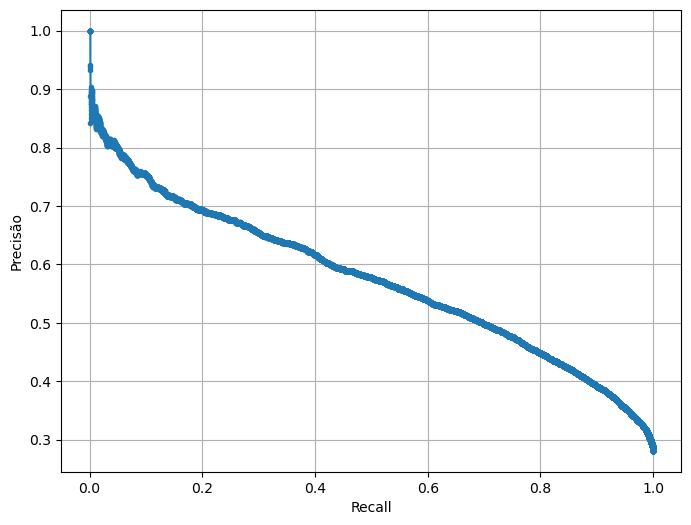

In [28]:
data = pd.read_csv('data.csv', delimiter=';')
data = data.dropna(subset=['Vai Chover Amanha'])#Removendo linhas com valores faltantes na coluna de outliers
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
    ('os', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced', criterion='entropy', max_depth=24, min_samples_split=34, min_samples_leaf=36, min_weight_fraction_leaf=0.00018775656434644747, ccp_alpha=2.0533349194068356e-05, n_estimators=5*50)),
    ])

pipeline.fit(X_train, y_train)

for i in range(2001,2025):
    print(i)
    f_X_test = X_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[pd.to_datetime(X_test['Data']).dt.year == i]
    f_y_test.reset_index(drop=True, inplace=True)
    

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

for cidade in data['Cidade'].unique():
    print(cidade)
    f_X_test = X_test.copy().loc[X_test['Cidade'] == cidade]
    f_X_test.reset_index(drop=True, inplace=True)

    f_y_test = y_test.copy().loc[X_test['Cidade'] == cidade]
    f_y_test.reset_index(drop=True, inplace=True)

    y_pred = pipeline.predict(f_X_test)
    accuracy = accuracy_score(f_y_test, y_pred)

    y_true  = (f_y_test == 'Sim').astype(int)
    y_pred  = (y_pred == 'Sim').astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)


    print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
    print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

y_pred = pipeline.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)

y_true  = (y_test == 'Sim').astype(int)
y_pred  = (y_pred == 'Sim').astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

FP = np.sum((y_pred == 1) & (y_true == 0))
VP = np.sum((y_pred == 1) & (y_true == 1))
FN = np.sum((y_pred == 0) & (y_true == 1))
VN = np.sum((y_pred == 0) & (y_true == 0))

print(f"VP: {VP} - VN: {VN} - FP: {FP} - FN: {FN}")
print(f"{VP}\t{VN}\t{FP}\t{FN}")
print(f"Test: Accuracy: {str(accuracy).replace('.',',')} | Precision:{str(precision).replace('.',',')} | Recall:{str(recall).replace('.',',')} | F1-score:{str(f1).replace('.',',')}")
print(f"{str(accuracy).replace('.',',')[1:-2]}\t{str(precision).replace('.',',')}\t{str(recall).replace('.',',')}\t{str(f1).replace('.',',')}")

class_labels = pipeline.classes_
class_index = np.where(class_labels == "Sim")[0][0]

y_probs = pipeline.predict_proba(X_test.copy())[:, class_index]

y_true  = (y_test.copy() == 'Sim').astype(int)

precision, recall, _ = precision_recall_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

In [49]:
#variancia explicada cumulativa
data = pd.read_csv('data.csv', delimiter=';')

data = data.dropna(subset=['Vai Chover Amanha'])
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
])

X_train = pipeline.fit_transform(X, y)

nums = np.arange(33)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_train)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

print(nums)
for num in nums:
  print(num, str(var_ratio[num]).replace('.',','))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
0 0,0
1 0,19928256467510946
2 0,36522053397946797
3 0,49431040365488244
4 0,6116265524806593
5 0,6710443430578076
6 0,7171901698030384
7 0,7540841973820696
8 0,7859258104619828
9 0,8117712207390917
10 0,8339834849426848
11 0,8541347548100701
12 0,8737876722260907
13 0,8932942552733636
14 0,9106860923117421
15 0,9252535023982084
16 0,9393737225180241
17 0,9519313463293706
18 0,9635343561870503
19 0,971324415658052
20 0,9787047973153807
21 0,9835988026836521
22 0,9872044007374016
23 0,9903998350567349
24 0,9934416863063922
25 0,9958526480676464
26 0,9977247058074179
27 0,9989183323353671
28 0,999432694894747
29 0,9997705975869166
30 0,9999205475662435
31 0,9999892260451898
32 1,0


In [ ]:
#descrição do conjunto de dados após a normalização
data = pd.read_csv('data.csv', delimiter=';')

data = data.dropna(subset=['Vai Chover Amanha'])
data.reset_index(drop=True, inplace=True)

X = data.drop('Vai Chover Amanha', axis=1)
y = data['Vai Chover Amanha']

pipeline = Pipeline(steps=[
    ('manual',ManualFeatureSelectorTransformer()),
    ('imputer',ImputerTransformer()),
    ('date', DateTransformer()),
    ('scaler', RobustScalerTransformer()),
])

X_train = pipeline.fit_transform(X, y)
print(X_train[['Precipitacao Total', 'Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima','Precipitacao Total', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media']].describe())

print(X_train[['Umidade Media', 'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H',
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H']].describe())

print(X_train[['Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Radiacao Global', 'Altitude']].describe())


In [ ]:
#analise dos valores faltantes
data = pd.read_csv('data.csv', delimiter=';')

data.drop('Radiacao Global', axis=1, inplace=True)
data.drop('Cidade', axis=1, inplace=True)
data.drop('Codigo', axis=1, inplace=True)
data.drop('Latitude', axis=1, inplace=True)
data.drop('Longitude', axis=1, inplace=True)

data['Data'] = pd.to_datetime(data['Data'])
data['Ano'] = data['Data'].dt.year
data.drop('Data', axis=1, inplace=True)

print('any:')
counter = 0
for i in range(2001,2025):
    filtro = data.loc[(data['Ano']  == i)].drop('Ano', axis=1)
    counter += filtro.isna().any(axis=1).sum()
    print(f'{i}\t{filtro.isna().any(axis=1).sum()}')
print(f'Total\t{counter}')

print('all:')
counter = 0
for i in range(2001,2025):
    filtro = data.loc[(data['Ano']  == i)].drop('Ano', axis=1)
    counter += filtro.isna().all(axis=1).sum()
    print(f'{i}\t{filtro.isna().all(axis=1).sum()}')
print(f'Total\t{counter}')

print('i:')
counter = 0
for i in range(2001,2025):
    counter += data.loc[(data['Ano']  == i)]['Vai Chover Amanha'].isna().sum()
    value = data.loc[(data['Ano']  == i)]['Vai Chover Amanha'].isna().sum()
    print(f'{i}\t{value}')
print(f'Total\t{counter}')

In [ ]:
#analise dos outliers usando o z-score
data = pd.read_csv('data.csv', delimiter=';')

data = data.dropna()
data.reset_index(drop=True, inplace=True)

columns = ['Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima','Precipitacao Total', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media', 'Umidade Media', 
                'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H',
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H', 'Vento Velocidade Media 0H', 'Vento Velocidade Media 6H',
                'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Radiacao Global', 'Altitude']

counter = 0
for column in columns:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 4
    outliers_mask = (z_scores > threshold)

    num_outliers = outliers_mask.sum()
    print(f"{column}\t{num_outliers}")
    counter += outliers_mask.sum()
print(counter)

column = 'Precipitacao Total'
data = data[data[column] != 0]

z_scores = np.abs(stats.zscore(data[column]))
threshold = 4
outliers_mask = (z_scores > threshold)

num_outliers = outliers_mask.sum()
print(f"{column}\t{num_outliers}")

In [ ]:
#descrição geral dos dados
data = pd.read_csv('data.csv', delimiter=';')

data = data.dropna()
data.reset_index(drop=True, inplace=True)

print(data[['Precipitacao Total', 'Pressao Maxima','Pressao Minima','Temperatura Maxima','Temperatura Minima','Temperatura Orvalho Maxima','Temperatura Orvalho Minima',
                'Umidade Minima', 'Umidade Maxima','Precipitacao Total', 'Pressao Media', 'Temperatura Media', 'Temperatura Orvalho Media']].describe())

print(data[['Umidade Media', 'Direcao Vento 0H','Direcao Vento 6H','Direcao Vento 12H','Direcao Vento 18H', 'Rajada Maxima de Vento 0H', 'Rajada Maxima de Vento 6H',
                'Rajada Maxima de Vento 12H', 'Rajada Maxima de Vento 18H']].describe())

print(data[['Vento Velocidade Media 0H', 'Vento Velocidade Media 6H', 'Vento Velocidade Media 12H', 'Vento Velocidade Media 18H', 'Radiacao Global', 'Altitude']].describe())

In [ ]:
#contagem de valores por classe no atributo alvo
data = pd.read_csv('data.csv', delimiter=';')

print(data['Vai Chover Amanha'].value_counts())

In [24]:
data = pd.read_csv('data.csv', delimiter=';')

#busca por outliers nos atributos de latitude e longitude
for value in data.dropna()['Codigo'].unique():
    filtered = data[(data['Codigo'] == value)]
    lat_mode = filtered['Latitude'].mode()[0]
    long_mode = filtered['Longitude'].mode()[0]
    alt_mode = filtered['Altitude'].mode()[0]
    lat_outliers = (filtered['Latitude'] != lat_mode).sum()
    long_outliers = (filtered['Longitude'] != long_mode).sum()
    alt_outliers = (filtered['Altitude'] != alt_mode).sum()
    print("cod - ", value, " lat: ", lat_mode, " outliers: ", lat_outliers, " - long: ", long_mode, " outliers: ", long_outliers, " - alt: ", alt_mode, " outliers: ", alt_outliers)


cod -  A801  lat:  -30.05361111  outliers:  0  - long:  -51.17472221  outliers:  0  - alt:  41.18  outliers:  0
cod -  A802  lat:  -32.07888888  outliers:  0  - long:  -52.16777777  outliers:  0  - alt:  4.92  outliers:  0
cod -  A803  lat:  -29.72499999  outliers:  0  - long:  -53.72055554  outliers:  0  - alt:  103.1  outliers:  0
cod -  A804  lat:  -30.75055555  outliers:  0  - long:  -55.40138888  outliers:  0  - alt:  196.0  outliers:  0
cod -  A805  lat:  -27.85444444  outliers:  0  - long:  -53.7911111  outliers:  0  - alt:  489.67  outliers:  0
cod -  A808  lat:  -29.35027777  outliers:  0  - long:  -49.73333333  outliers:  0  - alt:  8.44  outliers:  0
cod -  A809  lat:  -29.83999999  outliers:  0  - long:  -57.08194443  outliers:  0  - alt:  74.29  outliers:  0
cod -  A810  lat:  -27.89055555  outliers:  0  - long:  -54.47999999  outliers:  0  - alt:  272.84  outliers:  0
cod -  A812  lat:  -30.54527777  outliers:  0  - long:  -53.46694443  outliers:  0  - alt:  420.82  outli